## Import

In [ ]:
%matplotlib inline
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd


### Definition of classes

## Map and Robot definition
'Map' has the following parameters:

-length

-width

-grid: we'll create a grid as numpy array length x width -dimensional, initialized with 0s and updated with 1 only the position of robot

-state: a boolean to check if a point is in the map or not


'Map' has the following aims:

-ensure that future destination for robot is allowed: we need a method to check the condition that x_future and y_future must be between 0 and length and between 0 and width on the grid

In [ ]:
empty_grid = {
    'empty': True,
    'image_f': np.zeros([1,1]),
    'image_b': np.zeros([1,1]),
    'image_l': np.zeros([1,1]),
    'image_r': np.zeros([1,1])
}

def create_grid(width,length):
    grid=np.array([{} for i in range(width) for j in range(length)]).reshape((width,length))
    #grid initialization with True in every element (all positions in the map are allowed)
    for ind_width in range(grid.shape[0]):
      for ind_length in range(grid.shape[1]):
        # ['image_f','image_b','image_l','image_r','depth_f','depth_b','depth_l','depth_r']
        grid[ind_width][ind_length]['empty']=True
        grid[ind_width][ind_length]['image_f']=np.zeros([1,1])
        grid[ind_width][ind_length]['image_b']=np.zeros([1,1])
        grid[ind_width][ind_length]['image_l']=np.zeros([1,1])
        grid[ind_width][ind_length]['image_r']=np.zeros([1,1])
        grid[ind_width][ind_length]['depth_f']=np.zeros([1,1])
        grid[ind_width][ind_length]['depth_b']=np.zeros([1,1])
        grid[ind_width][ind_length]['depth_l']=np.zeros([1,1])
        grid[ind_width][ind_length]['depth_r']=np.zeros([1,1])

    return grid


class Map:
    def __init__(self,width,length):
        self.length=length
        self.width=width
        self.grid=create_grid(self.width,self.length)


        #grid is width x length x 5 (state and the 4 images to analyze)
        #
        #grid:
        #           x
        #              - - - - -length - - - - -> y
        #     width |  0   1 2 3 4 5 6 7 8
        #           |  1
        #           |  2
        #           |  3
        #           V
        # i dedice this convention about the angle theta:
        # if in 0,0 he cannot move back, as depicted in the map
        # left is in the positive direction of y-axis
        #

    def initial_position(self,first_x,first_y):
        if first_x<0 or first_x>=self.width:
            check=False
        elif first_y<0 or first_y>=self.length:
            check=False
        else:
            check=True
        return check

    def print_map(self,x=0,y=0,robot_marker=False):
        # Print the map using matplotlib
        plt.figure(figsize=(self.width, self.length))

        gridstates=np.zeros([self.width,self.length])
        for ind_width in range(self.grid.shape[0]):
          for ind_length in range(self.grid.shape[1]):
            gridstates[self.width-1-ind_width][ind_length]=self.grid[ind_width][ind_length]['empty']

        # gridstates=np.rot90(gridstates)
        # print(gridstates)


        # Plot the map
        for i in range(self.width):
          for j in range(self.length):
              # if gridstates[i][j]:
                  plt.plot([j, j+1, j+1, j, j], [i, i, i+1, i+1, i], 'k-', linewidth=3)

        plt.imshow(gridstates, cmap='gray',interpolation='nearest', extent=[0, self.length, 0, self.width])
        if robot_marker:
          plt.scatter(x+0.5,y+0.5,color='darkorange')

    def print_map_new(self,x=0,y=0,robot_marker=False):
        # Print the map using matplotlib
        fig, ax = plt.subplots()


        # ax.figure(figsize=(self.width, self.length))

        gridstates=np.zeros([self.width,self.length])
        for ind_width in range(self.grid.shape[0]):
          for ind_length in range(self.grid.shape[1]):
            gridstates[self.width-1-ind_width][ind_length]=self.grid[ind_width][ind_length]['empty']

        # gridstates=np.rot90(gridstates)
        # print(gridstates)


        # Plot the map

        for i in range(self.width):
          for j in range(self.length):
              # if gridstates[i][j]:
                  ax.plot([j, j+1, j+1, j, j], [i, i, i+1, i+1, i], 'k-', linewidth=3)

        ax.imshow(gridstates, cmap='gray',interpolation='nearest', extent=[0, self.length, 0, self.width])
        if robot_marker:
          ax.scatter(x+0.5,y+0.5,color='darkorange')

        fig.canvas.draw()












        def add_obstacle(self,width_x,width_y):
          self.grid[width_x][width_y]['empty']=False




class Robot:
    def __init__(self, x, y,_map):
      # i need to give an initial position to the robot
      # i need to check if initial position is an allowed one
      # i call initial_position method of class Map to return a boolean that initializes or ask again for initialization (in case of invalid coordinates)
      self.x=x
      self.y=y
      self.map=_map
      initial_check=self.map.initial_position(x,y)
      if initial_check==False:
        raise ValueError("Invalid coordinates")
      #if the position is allowed i have to update the empty from True to False in the corresponding element of grid
      self.map.grid[x][y]['empty']=False

    ### UNITARY MOVEMENTS ###
    def move_back(self):
         # two scenarios to check:
         # 1-future position is still on the map
         # 2-empty of future position is True
          #if both checks are good, update future and present empy, and then robot position

         #1-
         if self.x-1>=self.map.width or self.x-1<0:
            raise ValueError("Going back is not valid")
         #2-
         if self.map.grid[self.x-1][self.y]['empty']==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x-1][self.y]['empty']=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y]['empty']=True
            #update of NEW robot position
            self.x-=1
         else:
          raise ValueError("Invalid action")


    def move_left(self):
         #LEFT: Y+1
         #1-
         if self.y+1>=self.map.length or self.y+1<0:
            raise ValueError("Going left is not valid")
         #2-
         if self.map.grid[self.x][self.y+1]['empty']==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x][self.y+1]['empty']=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y]['empty']=True
            #update of NEW robot position
            self.y+=1
         else:
          raise ValueError("Invalid action")

    def move_right(self):
         #RIGHT: Y-1
         #1-
         if self.y - 1 >= self.map.length or self.y - 1 < 0:
            raise ValueError("Going right is not valid")
         #2-
         if self.map.grid[self.x][self.y-1]['empty']==True:
          #movement is possible so I need to update FUTURE empy state to False
          self.map.grid[self.x][self.y-1]['empty']=False
          #update of PRESENT empy state to True because robot is leaving that position
          self.map.grid[self.x][self.y]['empty']=True
          #update of NEW robot position
          self.y-=1
         else:
          raise ValueError("Invalid action")

    def move_straight(self):
      #1-
      if self.x+1>=self.map.width or self.x+1<0:
        raise ValueError("Going straight is not valid")
      #2-
      if self.map.grid[self.x+1][self.y]['empty']==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x+1][self.y]['empty']=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y]['empty']=True
            #update of NEW robot position
            self.x+=1
      else:
          raise ValueError("Invalid action")

    ### GENERALISED MOVEMENT ###
    def move(self,direction,steps):
      #valid direction to pass as a string between:'stop','straight','left','right','back'
      if direction not in ['stop','straight','left','right','back']:
        raise ValueError("Select a valid direction: stop, straight, left, right or back")
      #at each step i should check that the imminent next element of grid is empty
      if direction=='straight':
        if steps==1:
          self.move_straight()
        else:
          for i in range(0,steps):
              self.move_straight()

      if direction=='back':
        if steps==1:
          self.move_back()
        else:
          for i in range(0,steps):
              self.move_back()


      if direction=='left':
        if steps==1:
          self.move_left()
        else:
          for i in range(0,steps):
              self.move_left()
      if direction=='right':
        if steps==1:
          self.move_right()
        else:
          for i in range(0,steps):
              self.move_right()



## Test of movement function

In [ ]:
firstmap=Map(17,5)
pepper=Robot(0,0,firstmap)


# in 0,0 robot cannot move back

#let's move him straight, left, back, and right to return to 0,0 position
### 0)   robot --
#          --  --

### 1)     --  --
#        robot --

## 2)     --   --
#         --   robot

### 3)     --   robot
#         --     --

### 4)     robot --
#          --   --

pepper.move_straight()
assert(pepper.x==1)
assert(pepper.map.grid[0][0]['empty']==True)
assert(pepper.map.grid[1][0]['empty']==False)

pepper.move_left()
assert(pepper.y==1)
assert(pepper.map.grid[1][0]['empty']==True)
assert(pepper.map.grid[1][1]['empty']==False)

pepper.move_right()
assert(pepper.y==0)
assert(pepper.map.grid[1][1]['empty']==True)
assert(pepper.map.grid[1][0]['empty']==False)

pepper.move_back()
assert(pepper.x==0)
assert(pepper.map.grid[1][0]['empty']==True)
assert(pepper.map.grid[0][0]['empty']==False)

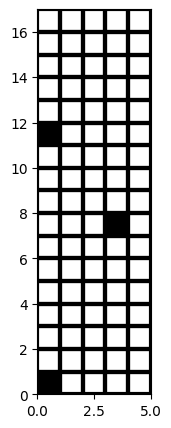

In [ ]:
firstmap=Map(17,5)

pepper=Robot(0,0,firstmap)

#some test for generalised movement function
# pepper.move(direction="straight",steps=5)
# pepper.move("back",steps=3)
# print(pepper.x)
# print(pepper.map.grid[5][0]['empty'])

pepper.map.grid[11][0]['empty']=False
# pepper.move(direction="straight", steps=2)
# print(pepper.x)

pepper.map.grid[7][3]['empty']=False
pepper.map.print_map()

# pepper.move("left",2)
# pepper.map.print_map()
# print(pepper.y)
# pepper.move("left",1)
# print(pepper.x)

# pepper.map.grid[7][2]['empty']=False
# pepper.move("right",1)
# pepper.y

## Data and creation of map

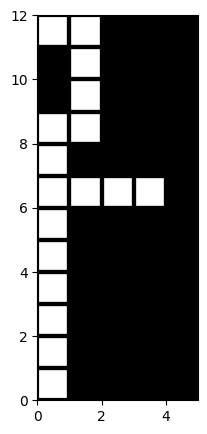

In [ ]:
border=12
map=Map(border,5)
for i in range(6):
  map.grid[i][1]['empty']=False
  map.grid[i][2]['empty']=False
  map.grid[i][3]['empty']=False

map.grid[9][0]['empty']=False
map.grid[10][0]['empty']=False


# 7,3 to 11,3
# every [i,4]

# 7,1-- 7,2 to 11,2
for i in range(7,border):
  map.grid[i][2]['empty']=False
map.grid[7][1]['empty']=False

# 7,3 to 11,3
for i in range(7,border):
  map.grid[i][3]['empty']=False

# every [i,4]
for i in range(border):
  map.grid[i][4]['empty']=False



# Open a file and use dump()
with open('map.pkl', 'wb') as file:

    # A new file will be created
    proof= pickle.dump(map, file)
with open('map.pkl', 'rb') as file:

    # Call load method to deserialze
    mymap = pickle.load(file)

mymap.print_map()


In [ ]:
def list_of_obstacles_from_the_map(map,body=False):
  '''this function takes a map as argument and returns a list of obstacles' coordinate'''
  coordinates_list=[]
  if body:
    for width in range(map.width):
      for length in range(map.length):
        if map.grid[width][length][0]==False:
          coordinates_list.append(np.array([width,length]))
  else:
      for width in range(map.width):
        for length in range(map.length):
          if map.grid[width][length]['empty']==False:
            coordinates_list.append(np.array([width,length]))

  return coordinates_list

In [ ]:
list_of_obstacles_from_the_map(mymap)

[array([0, 1]),
 array([0, 2]),
 array([0, 3]),
 array([0, 4]),
 array([1, 1]),
 array([1, 2]),
 array([1, 3]),
 array([1, 4]),
 array([2, 1]),
 array([2, 2]),
 array([2, 3]),
 array([2, 4]),
 array([3, 1]),
 array([3, 2]),
 array([3, 3]),
 array([3, 4]),
 array([4, 1]),
 array([4, 2]),
 array([4, 3]),
 array([4, 4]),
 array([5, 1]),
 array([5, 2]),
 array([5, 3]),
 array([5, 4]),
 array([6, 4]),
 array([7, 1]),
 array([7, 2]),
 array([7, 3]),
 array([7, 4]),
 array([8, 2]),
 array([8, 3]),
 array([8, 4]),
 array([9, 0]),
 array([9, 2]),
 array([9, 3]),
 array([9, 4]),
 array([10,  0]),
 array([10,  2]),
 array([10,  3]),
 array([10,  4]),
 array([11,  2]),
 array([11,  3]),
 array([11,  4])]

In [ ]:
map.grid[6][3]['empty']

True

In [ ]:
pepper=Robot(0,0,mymap)

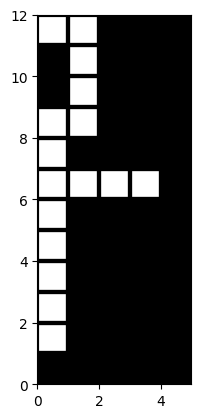

In [ ]:
pepper.map.print_map_new()

In [ ]:
from google.colab import drive
from matplotlib.image import imread

drive.mount('/content/gdrive')
#need to upload images from folder
#positions to update with images:
#0_0, 10_1, 11_0, 11_1, 1_0, 2,_0, 3_0, 4_0, 5_0, 6_0, 6_1, 6_2, 6_3, 7_0, 8_0, 8_1, 9_1
path_folder='/content/gdrive/MyDrive/Paris_Est_thesis/map/'
image_string_list=['image_straight.jpg','image_back.jpg','image_left.jpg','image_right.jpg','depth_straight.jpg','depth_back.jpg','depth_left.jpg','depth_right.jpg']
grid_field_list=['image_f','image_b','image_l','image_r','depth_f','depth_b','depth_l','depth_r']
list_str_gridposition=['0_0', '10_1', '11_0', '11_1', '1_0', '2_0', '3_0', '4_0', '5_0', '6_0', '6_1', '6_2', '6_3', '7_0', '8_0', '8_1', '9_1']
for i in range(len(list_str_gridposition)):
  for namefile, gridkey in zip(image_string_list,grid_field_list):
    x_pos=int(list_str_gridposition[i].split(sep='_')[0])
    y_pos=int(list_str_gridposition[i].split(sep='_')[1])
    pepper.map.grid[x_pos][y_pos][gridkey]=imread(path_folder+list_str_gridposition[i]+'/'+namefile)



Mounted at /content/gdrive


In [ ]:
def insert_images():
  drive.mount('/content/gdrive')
  #need to upload images from folder
  #positions to update with images:
  #0_0, 10_1, 11_0, 11_1, 1_0, 2,_0, 3_0, 4_0, 5_0, 6_0, 6_1, 6_2, 6_3, 7_0, 8_0, 8_1, 9_1
  path_folder='/content/gdrive/MyDrive/Paris_Est_thesis/map/'
  image_string_list=['image_straight.jpg','image_back.jpg','image_left.jpg','image_right.jpg','depth_straight.jpg','depth_back.jpg','depth_left.jpg','depth_right.jpg']
  grid_field_list=['image_f','image_b','image_l','image_r','depth_f','depth_b','depth_l','depth_r']
  list_str_gridposition=['0_0', '10_1', '11_0', '11_1', '1_0', '2_0', '3_0', '4_0', '5_0', '6_0', '6_1', '6_2', '6_3', '7_0', '8_0', '8_1', '9_1']
  for i in range(len(list_str_gridposition)):
    for namefile, gridkey in zip(image_string_list,grid_field_list):
      x_pos=int(list_str_gridposition[i].split(sep='_')[0])
      y_pos=int(list_str_gridposition[i].split(sep='_')[1])
      pepper.map.grid[x_pos][y_pos][gridkey]=imread(path_folder+list_str_gridposition[i]+'/'+namefile)


## YOLO loading

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 115MB/s]


## YOLO testing


0: 480x640 4 bottles, 1 cup, 1 chair, 3 tvs, 1 mouse, 1 keyboard, 1 book, 3461.4ms
Speed: 6.2ms preprocess, 3461.4ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


array([[[254, 191, 184],
        [253, 190, 181],
        [253, 191, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 191, 182],
        [255, 193, 182],
        [255, 193, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 193, 178],
        [255, 193, 176],
        [255, 196, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[133,   0,  82],
        [133,   0,  82],
        [ 72,  20,  54],
        ...,
        [152, 128, 124],
        [149, 131, 121],
        [147, 131, 116]],

       [[133,   0,  82],
        [133,   0,  82],
        [133,   0,  82],
        ...,
        [153, 127, 130],
        [154, 128, 127],
        [152, 129, 123]],

       [[133,   0,  82],
        [133,   0,  82],
        [133,   0,  82],
        ...,
        [156, 126, 134],
        [157, 128, 130],
        [152, 124, 123]]], dtype=uint8)
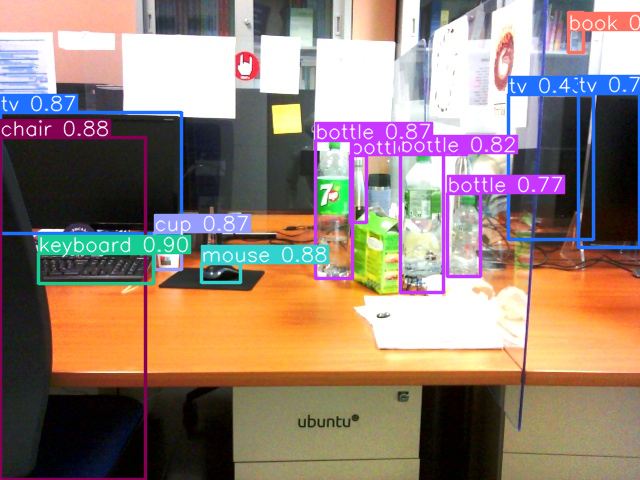

In [ ]:
results = model.predict(pepper.map.grid[3][0]['image_r'])
results[0].plot()

In [ ]:
results = model.predict(pepper.map.grid[1][0]['image_l'])
list_item_detected=results[0].boxes.cls.tolist()
print(list_item_detected)


0: 480x640 (no detections), 1129.1ms
Speed: 3.8ms preprocess, 1129.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
[]


In [ ]:
# questa è la struttura che userò per ogni foto di ogni posizione per capire se l'oggetto
# richiesto (una stringa di partenza) è stato trovato e con quale probabilità
results = model.predict(pepper.map.grid[6][3]['image_f'])
list_item_detected=results[0].boxes.cls.tolist()
list_probabilities=results[0].boxes.conf.tolist()
list_names=[results[0].names[results[0].boxes.cls.tolist()[i]] for i in range(len(results[0].boxes.cls.tolist()))]
dict_detected=dict(zip(list_names,list_probabilities))
dict_detected.keys()


0: 480x640 1 person, 3 chairs, 1 dining table, 1 refrigerator, 1760.2ms
Speed: 5.8ms preprocess, 1760.2ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)


dict_keys(['dining table', 'chair', 'person', 'refrigerator'])

In [ ]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
def remove_punctuation(results):
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  str_to_change=results
  for el in str_to_change:
    if el in punc:
      str_to_change=results.replace(el,"")
  return str_to_change


In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
str_to_change=results[0].verbose()
for el in results[0].verbose():
  if el in punc:
    str_to_change=results[0].verbose().replace(el,"")
print(str_to_change)
# 1 person, 3 chairs, 1 dining table, 1 refrigerator,
# 1 person 3 chairs 1 dining table 1 refrigerator
# [0.9154, 0.8908, 0.8711, 0.8323, 0.7563, 0.3108]
# voglio sapere a quale oggetto corrisponde ciascun elemento della lista results[0].boxes.conf
# sintassi per ottenere valore della probabilità: results[0].boxes.conf[0].item()
# 1 person 3 chairs 1 dining table 1 refrigerator
# c'è un problema con le parole composte
# compound_words=['diningtable','cellphone','trafficlight','firehydrant']
lista=list(str_to_change.split())
print(lista)
numbers='123456789'
# ad un numero segue sempre una parola e se ad una parola ne segue un'altra
# allora queste devono essere la stessa parola
numbers_index=[i for i in range(len(lista)) if lista[i] in numbers]
words_index=[i for i in range(len(lista)) if lista[i] not in numbers]
for j in range(len(words_index)-1):
  if words_index[j+1]-words_index[j]==1:
    lista[words_index[j]]=lista[words_index[j]]+lista[words_index[j+1]]
    lista.pop(words_index[j+1])
lista

1 person 3 chairs 1 dining table 1 refrigerator 
['1', 'person', '3', 'chairs', '1', 'dining', 'table', '1', 'refrigerator']


['1', 'person', '3', 'chairs', '1', 'diningtable', '1', 'refrigerator']

What we want to do:
- using Yolov8 inside the Q-Learning algorithm: **how**?
  - highest *reward* in case of existence of searched object into the results.verbose() list of detected objects
  
  (avoiding puntuactions on results.verbose() list --> TEXT PREPROCESSING)

    - it could be helpful to retrieve the detection probability of that object
    

array([[[227, 206, 213],
        [228, 207, 214],
        [228, 209, 213],
        ...,
        [199, 193, 203],
        [196, 193, 202],
        [199, 196, 205]],

       [[228, 207, 216],
        [228, 208, 217],
        [229, 209, 218],
        ...,
        [200, 197, 208],
        [200, 197, 206],
        [200, 199, 207]],

       [[228, 207, 222],
        [229, 208, 223],
        [229, 208, 223],
        ...,
        [200, 197, 214],
        [200, 198, 209],
        [198, 198, 206]],

       ...,

       [[145, 119, 132],
        [148, 122, 133],
        [149, 119, 129],
        ...,
        [115, 113, 135],
        [116, 117, 135],
        [110, 111, 129]],

       [[146, 125, 130],
        [150, 127, 135],
        [157, 124, 143],
        ...,
        [ 99,  97, 111],
        [116, 113, 130],
        [127, 124, 141]],

       [[142, 124, 124],
        [145, 122, 130],
        [155, 121, 145],
        ...,
        [ 70,  67,  78],
        [102,  98, 113],
        [114, 110, 127]]], dtype=uint8)
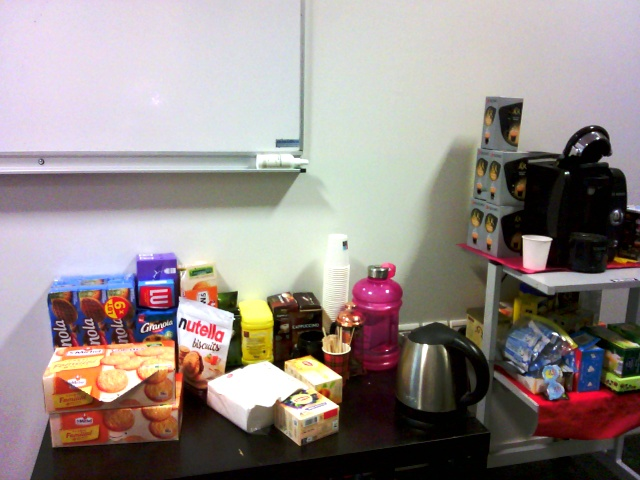

In [ ]:
pepper.map.grid[9][1]['image_l']

array([[[ 49,  44,  41],
        [ 50,  45,  41],
        [ 52,  42,  40],
        ...,
        [254, 255, 255],
        [254, 255, 253],
        [254, 255, 253]],

       [[ 52,  46,  46],
        [ 53,  48,  45],
        [ 54,  46,  43],
        ...,
        [254, 255, 255],
        [254, 255, 253],
        [254, 255, 253]],

       [[ 51,  47,  48],
        [ 53,  49,  48],
        [ 53,  48,  44],
        ...,
        [255, 255, 255],
        [255, 255, 253],
        [255, 255, 253]],

       ...,

       [[143, 124, 128],
        [140, 124, 125],
        [143, 132, 126],
        ...,
        [  0,   5,   1],
        [  0,   3,   0],
        [  0,   3,   0]],

       [[148, 127, 136],
        [152, 131, 140],
        [159, 133, 142],
        ...,
        [  1,   6,   2],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[146, 124, 136],
        [152, 128, 141],
        [159, 127, 142],
        ...,
        [  2,   7,   3],
        [  0,   6,   0],
        [  0,   5,   0]]], dtype=uint8)
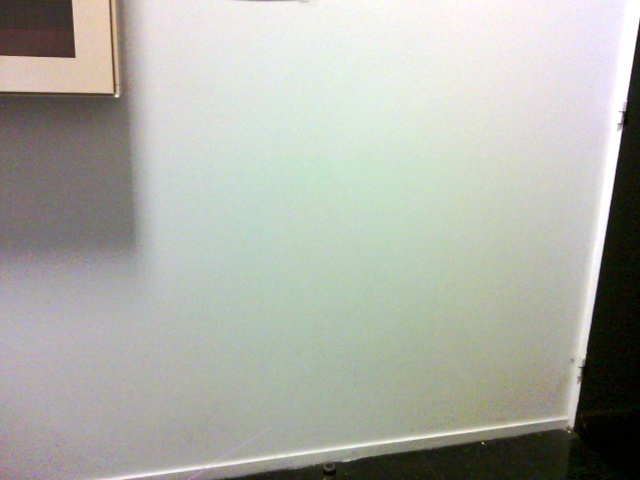

In [ ]:
pepper.map.grid[11][1]['image_l']

In [ ]:
from tqdm import tqdm
import cv2
from PIL import Image

Q_table=None
def yolo_qlearn(pepper=pepper,n_episodes=1000,max_iter_episode=1000,
                         exploration_proba=1,exploration_decreasing_decay=0.0007,
                         min_exploration_proba=0.01,gamma=0.99,lr=0.5,x_fin=12,
            y_fin=0,steps=1,see_evolution=False,startx=0,starty=0,object_to_search='chair'):
  global Q_table
  global steps_per_success_episode
  rewards_per_episode=[]
  steps_per_success_episode=[]
  Q_table=np.zeros(shape=(map.width,map.length,4))
  pepper=Robot(startx,starty,mymap)
  current_state_x=pepper.x
  current_state_y=pepper.y
  list_index_evolution=[0,int(n_episodes/3),int(n_episodes/2),int(2*n_episodes/3),n_episodes-1]
  first_pos_x=startx
  first_pos_y=starty
  reward=0
  insert_images()


  #we iterate over episodes
  for e in tqdm(range(n_episodes)):
      #we initialize the first state of the episode
      #for each epoch I need to put the robot at the start point and
      #to reset map. Now map has only originary obstacles and
      #there is no track of previous epoch's steps
      file=open('map.pkl','rb')
      resetmap=pickle.load(file)
      pepper=Robot(startx,starty,resetmap)
      current_state_x=startx
      current_state_y=starty
      nextstep_random=False
      nextstep_exploit=False
      done = False
      #we need to reinsert images at each epoch
      drive.mount('/content/gdrive')
      #need to upload images from folder
      #positions to update with images:
      #0_0, 10_1, 11_0, 11_1, 1_0, 2,_0, 3_0, 4_0, 5_0, 6_0, 6_1, 6_2, 6_3, 7_0, 8_0, 8_1, 9_1
      path_folder='/content/gdrive/MyDrive/Paris_Est_thesis/map/'
      image_string_list=['image_straight.jpg','image_back.jpg','image_left.jpg','image_right.jpg','depth_straight.jpg','depth_back.jpg','depth_left.jpg','depth_right.jpg']
      grid_field_list=['image_f','image_b','image_l','image_r','depth_f','depth_b','depth_l','depth_r']
      list_str_gridposition=['0_0', '10_1', '11_0', '11_1', '1_0', '2_0', '3_0', '4_0', '5_0', '6_0', '6_1', '6_2', '6_3', '7_0', '8_0', '8_1', '9_1']
      for i in range(len(list_str_gridposition)):
        for namefile, gridkey in zip(image_string_list,grid_field_list):
          x_pos=int(list_str_gridposition[i].split(sep='_')[0])
          y_pos=int(list_str_gridposition[i].split(sep='_')[1])
          pepper.map.grid[x_pos][y_pos][gridkey]=imread(path_folder+list_str_gridposition[i]+'/'+namefile)





      if e==n_episodes-1:
        see_evolution=True





      #sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      direction=['straight','left','right','back']
      for i in range(max_iter_episode):

          #if i in list_index_evolution:
            #print("Epoch: ",e," iteration: ",i," pepper: ", pepper.x,pepper.y)

          # we sample a float from a uniform distribution over 0 and 1
          # if the sampled flaot is less than the exploration proba
          #     the agent selects arandom action
          # else
          #     he exploits his knowledge using the bellman equation


          if np.random.uniform(0,1) < exploration_proba:

            #a random action should be taken by the robot
            #but it should be an allowed action which doesn't provoke an error
            #because of the not empty state of next position
            # we would like to explore, here stop has the same probability
            # of moving, at least for first stages we would like to
            # choose between movements

            direction=['straight','left','right','back']
            while nextstep_random == False:
                  nextstep_random=True
                  #print(direction,"iteration",i," epoch",e,"position",pepper.x,pepper.y,pepper.map.grid[1][0]['empty'])
                  chosen_direction=random.choice(direction)
                  action=direction.index(chosen_direction)
                  try:
                    first_pos_x=pepper.x
                    first_pos_y=pepper.y
                    pepper.move(chosen_direction,steps=1)
                    # print(pepper.x, pepper.y)
                    if action!=-1:
                      if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:", first_pos_x,pepper.x," y:",first_pos_y,pepper.y)
                    next_state_x,next_state_y = pepper.x,pepper.y

                  except ValueError:
                    nextstep_random=False
                    Q_table[pepper.x,pepper.y,action]=-100000
                    # we can update that he cannot go in that direction
                    # by removing it from the list
                    # this can help robot to be trapped in a loop
                    #direction.remove(chosen_direction)
            nextstep_random=False

          else:
            direction=['straight','left','right','back']
            while nextstep_exploit==False:
              #here we must return an allowed action, not just the argmax
              #for example it could happen that argmax is the index corresponding to
              #a movement towards to a not-empty state

                action = np.argmax(Q_table[pepper.x,pepper.y])
                #print(direction[action])
                nextstep_exploit=True
                try:
                  first_pos_x=pepper.x
                  first_pos_y=pepper.y
                  pepper.move(direction[action],steps=steps)
                  if action!=-1:
                     if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:",first_pos_x,pepper.x," y:",first_pos_y,pepper.y)

                  next_state_x,next_state_y = pepper.x,pepper.y

                except ValueError:
              #if it's a forbidden action I can update that value on Q-table into
              #a negative one and restart the while loop until the argmax allowed
              #action is returned
                  Q_table[pepper.x,pepper.y,action]=-100000
                  nextstep_exploit==False
            nextstep_exploit=False
          # track a random epoch to understand where robot has moved
          # if e==3*n_episodes/4:
            # print("position: ", pepper.x,pepper.y)
            # print("position: ", current_state_x, current_state_y, "  ",Q_table[current_state_x,current_state_y,:]
            #       , "next_action: ", np.argmax(Q_table[current_state_x,current_state_y,:]))

          if see_evolution:
              print("Epoch number: ",e)

              clear_output(wait=True)
              pepper.map.print_map_new(robot_marker=True,x=pepper.y,y=pepper.x)
              plt.show()
              plt.pause(0.005)



          # looking for the object to find
          # for each position: 'image_l','image_r','image_f','image_b' to check
          views=['image_l','image_r','image_f']
          for point_of_view in views:
            # print(pepper.map.grid[pepper.x][pepper.y][point_of_view].shape)
            image_data = pepper.map.grid[pepper.x][pepper.y][point_of_view]
            # print(pepper.x,pepper.y,point_of_view)
            # print(image_data.shape)
            model = YOLO("yolov8m.pt")
            # Converti i dati dell'immagine in un formato compatibile con YOLO
            # image = Image.fromarray(image_data)
            # image = np.array(image)
            # image = cv2.resize(image, (612, 415))
            # image = np.expand_dims(image, axis=0)  # Aggiungi una dimensione batch
            # # Normalizza l'immagine
            # image = image / 255.0
            # Effettua la predizione
            results = model.predict(image_data)
            list_item_detected=results[0].boxes.cls.tolist()
            list_probabilities=results[0].boxes.conf.tolist()
            list_names=[results[0].names[results[0].boxes.cls.tolist()[i]] for i in range(len(results[0].boxes.cls.tolist()))]
            dict_detected=dict(zip(list_names,list_probabilities))
            if object_to_search in dict_detected.keys():
              proba_detect=dict_detected[object_to_search]
              reward=100
              done=True
              steps_per_success_episode.append([e,i])
              break
            else:
              reward-=1

          if done:
            break


          #print("current_state: ", (current_state_x,current_state_y), " next_state: ", (next_state_x,next_state_y))

          # We update our Q-table using the Q-learning iteration
          Q_table[current_state_x,current_state_y, action] = (1-lr) * Q_table[current_state_x,current_state_y, action] +lr*(reward + gamma*max(Q_table[next_state_x,next_state_y,:]))
          total_episode_reward = total_episode_reward + reward
          # If the episode is finished, we leave the for loop


          current_state_x,current_state_y= next_state_x,next_state_y

      #We update the exploration proba using exponential decay formula
      exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
      rewards_per_episode.append(total_episode_reward)
      #to track the position at the end of each epoch
      # if i==(max_iter_episode-1):
      #   print("Epoch ", e, " final destination: ", pepper.x," ",pepper.y)
      # to track when destination is reached

  return rewards_per_episode, steps_per_success_episode

In [ ]:
# list_rewards=[]
# list_success=[]
# import time

# num_runs = 1

# # Apri il file in modalità append per salvare i tempi di esecuzione
# with open('execution_times.txt', 'a') as f:
#     for i in range(num_runs):
#         # Registra l'ora di inizio
#         start_time = time.time()
#         rewards_per_episode,success=yolo_qlearn(n_episodes=50,max_iter_episode=50,lr=0.5,exploration_decreasing_decay=0.001,object_to_search='microwave')
#         list_rewards.append(rewards_per_episode)
#         list_success.append(success)

#         end_time = time.time()

#         execution_time = end_time - start_time

#         # Salva il risultato nel file
#         f.write(f"Run {i+1} n_episodes=20,max_iter_episode=100: Execution time: {execution_time}\n")
#         f.write(f"\nList of rewards per episode: {rewards_per_episode}\n")

#         # Visualizza il risultato
#         print(f"Run {i+1}: Execution time: {execution_time}")

# plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
# plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


  0%|          | 0/50 [00:00<?, ?it/s]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1177.8ms
Speed: 2.5ms preprocess, 1177.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1716.4ms
Speed: 4.3ms preprocess, 1716.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1431.5ms
Speed: 2.4ms preprocess, 1431.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1806.6ms
Speed: 4.3ms preprocess, 1806.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1124.2ms
Speed: 2.4ms preprocess, 1124.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1257.9ms
Speed: 3.0ms preprocess, 1257.9

  2%|▏         | 1/50 [08:20<6:48:38, 500.39s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1129.5ms
Speed: 2.5ms preprocess, 1129.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1125.4ms
Speed: 2.4ms preprocess, 1125.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1146.6ms
Speed: 2.2ms preprocess, 1146.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1540.0ms
Speed: 4.9ms preprocess, 1540.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1571.2ms
Speed: 3.6ms preprocess, 1571.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1128.1ms
Speed: 2.4ms preprocess, 1128

  4%|▍         | 2/50 [15:21<6:02:50, 453.54s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1152.7ms
Speed: 3.5ms preprocess, 1152.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1124.5ms
Speed: 2.4ms preprocess, 1124.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1121.2ms
Speed: 2.3ms preprocess, 1121.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1855.8ms
Speed: 2.4ms preprocess, 1855.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1147.2ms
Speed: 2.3ms preprocess, 1147.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1126.8ms
Speed: 2.3ms preprocess, 1126.8

  6%|▌         | 3/50 [20:24<5:01:34, 384.99s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1128.6ms
Speed: 2.3ms preprocess, 1128.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1126.8ms
Speed: 2.3ms preprocess, 1126.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1130.6ms
Speed: 2.8ms preprocess, 1130.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1840.4ms
Speed: 2.3ms preprocess, 1840.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1134.8ms
Speed: 2.4ms preprocess, 1134.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1164.6ms
Speed: 3.1ms preprocess, 1164

  8%|▊         | 4/50 [28:42<5:29:21, 429.61s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1136.4ms
Speed: 2.4ms preprocess, 1136.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1244.9ms
Speed: 2.3ms preprocess, 1244.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1806.1ms
Speed: 2.2ms preprocess, 1806.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1134.5ms
Speed: 2.2ms preprocess, 1134.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1132.5ms
Speed: 2.3ms preprocess, 1132.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1187.4ms
Speed: 2.7ms preprocess, 1187.4

 10%|█         | 5/50 [37:00<5:40:38, 454.20s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1798.3ms
Speed: 5.4ms preprocess, 1798.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1130.9ms
Speed: 2.3ms preprocess, 1130.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1128.2ms
Speed: 2.5ms preprocess, 1128.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1162.7ms
Speed: 4.7ms preprocess, 1162.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1871.4ms
Speed: 2.6ms preprocess, 1871.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1134.4ms
Speed: 2.5ms preprocess, 1134.4

 12%|█▏        | 6/50 [45:20<5:44:35, 469.91s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1129.0ms
Speed: 2.4ms preprocess, 1129.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1125.9ms
Speed: 4.8ms preprocess, 1125.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1625.5ms
Speed: 2.4ms preprocess, 1625.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1453.4ms
Speed: 5.4ms preprocess, 1453.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1138.2ms
Speed: 2.3ms preprocess, 1138.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1182.5ms
Speed: 2.2ms preprocess, 1182.5

 14%|█▍        | 7/50 [53:38<5:43:18, 479.03s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1136.5ms
Speed: 2.1ms preprocess, 1136.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1818.1ms
Speed: 3.0ms preprocess, 1818.1ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1169.8ms
Speed: 5.2ms preprocess, 1169.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1141.1ms
Speed: 2.4ms preprocess, 1141.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1146.7ms
Speed: 2.4ms preprocess, 1146.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1601.5ms
Speed: 3.2ms preprocess, 1601.5

 16%|█▌        | 8/50 [1:01:57<5:39:48, 485.45s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1583.3ms
Speed: 2.2ms preprocess, 1583.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1130.5ms
Speed: 4.1ms preprocess, 1130.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1142.5ms
Speed: 2.5ms preprocess, 1142.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1131.5ms
Speed: 2.2ms preprocess, 1131.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1791.2ms
Speed: 2.4ms preprocess, 1791.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1181.0ms
Speed: 2.6ms preprocess, 1181

 18%|█▊        | 9/50 [1:10:16<5:34:30, 489.52s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1133.2ms
Speed: 2.3ms preprocess, 1133.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1147.8ms
Speed: 2.4ms preprocess, 1147.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1212.6ms
Speed: 2.4ms preprocess, 1212.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1856.1ms
Speed: 2.3ms preprocess, 1856.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1124.5ms
Speed: 2.2ms preprocess, 1124.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1420.4ms
Speed: 3.2ms preprocess, 1420

 20%|██        | 10/50 [1:18:34<5:28:04, 492.10s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1126.7ms
Speed: 3.1ms preprocess, 1126.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1653.2ms
Speed: 2.3ms preprocess, 1653.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1464.5ms
Speed: 2.2ms preprocess, 1464.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1139.3ms
Speed: 2.4ms preprocess, 1139.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1136.7ms
Speed: 2.4ms preprocess, 1136.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1181.1ms
Speed: 2.5ms preprocess, 1181.1

 22%|██▏       | 11/50 [1:26:52<5:21:06, 494.01s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1820.8ms
Speed: 2.4ms preprocess, 1820.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1130.5ms
Speed: 3.7ms preprocess, 1130.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1134.1ms
Speed: 2.2ms preprocess, 1134.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1131.6ms
Speed: 2.2ms preprocess, 1131.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1788.9ms
Speed: 2.3ms preprocess, 1788.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1247.3ms
Speed: 2.3ms preprocess, 1247.3

 24%|██▍       | 12/50 [1:35:11<5:13:48, 495.50s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1126.8ms
Speed: 5.8ms preprocess, 1126.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1138.4ms
Speed: 3.6ms preprocess, 1138.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1635.8ms
Speed: 2.3ms preprocess, 1635.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1515.6ms
Speed: 2.4ms preprocess, 1515.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1142.8ms
Speed: 2.3ms preprocess, 1142.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1152.4ms
Speed: 2.2ms preprocess, 1152.4

 26%|██▌       | 13/50 [1:43:29<5:05:59, 496.19s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1136.3ms
Speed: 3.1ms preprocess, 1136.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1752.3ms
Speed: 3.2ms preprocess, 1752.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1299.5ms
Speed: 2.4ms preprocess, 1299.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1119.5ms
Speed: 4.4ms preprocess, 1119.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1127.7ms
Speed: 5.6ms preprocess, 1127.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1127.8ms
Speed: 3.5ms preprocess, 1127

 28%|██▊       | 14/50 [1:48:32<4:22:44, 437.89s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1166.4ms
Speed: 3.5ms preprocess, 1166.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1156.6ms
Speed: 3.1ms preprocess, 1156.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1820.8ms
Speed: 2.2ms preprocess, 1820.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1155.3ms
Speed: 2.3ms preprocess, 1155.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1144.5ms
Speed: 4.3ms preprocess, 1144.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1150.0ms
Speed: 2.4ms preprocess, 1150

 30%|███       | 15/50 [1:56:52<4:26:25, 456.72s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1473.2ms
Speed: 5.7ms preprocess, 1473.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1621.1ms
Speed: 2.4ms preprocess, 1621.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1138.3ms
Speed: 2.4ms preprocess, 1138.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1145.7ms
Speed: 2.3ms preprocess, 1145.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1143.0ms
Speed: 2.3ms preprocess, 1143.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1809.6ms
Speed: 2.4ms preprocess, 1809.6

 32%|███▏      | 16/50 [2:05:11<4:25:59, 469.39s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1139.1ms
Speed: 3.5ms preprocess, 1139.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1149.1ms
Speed: 2.5ms preprocess, 1149.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1155.8ms
Speed: 2.5ms preprocess, 1155.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1443.9ms
Speed: 2.4ms preprocess, 1443.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1672.4ms
Speed: 2.6ms preprocess, 1672.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1146.6ms
Speed: 3.6ms preprocess, 1146

 34%|███▍      | 17/50 [2:13:32<4:23:23, 478.88s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1129.7ms
Speed: 2.3ms preprocess, 1129.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1134.4ms
Speed: 2.4ms preprocess, 1134.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1825.1ms
Speed: 2.2ms preprocess, 1825.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1142.5ms
Speed: 2.2ms preprocess, 1142.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1139.1ms
Speed: 2.4ms preprocess, 1139.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1147.8ms
Speed: 2.4ms preprocess, 1147

 36%|███▌      | 18/50 [2:21:51<4:18:42, 485.08s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1382.9ms
Speed: 2.4ms preprocess, 1382.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1727.0ms
Speed: 6.3ms preprocess, 1727.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1139.6ms
Speed: 2.2ms preprocess, 1139.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1131.1ms
Speed: 5.6ms preprocess, 1131.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1131.5ms
Speed: 2.3ms preprocess, 1131.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1803.7ms
Speed: 2.6ms preprocess, 1803.7

 38%|███▊      | 19/50 [2:26:35<3:39:24, 424.65s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1144.8ms
Speed: 2.5ms preprocess, 1144.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1139.2ms
Speed: 2.4ms preprocess, 1139.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1604.5ms
Speed: 2.3ms preprocess, 1604.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1514.5ms
Speed: 2.4ms preprocess, 1514.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 bottles, 1 tv, 1 laptop, 3 books, 1130.6ms
Speed: 2.4ms preprocess, 1130.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 chairs, 2 dining tables, 1 tv, 1132.8ms
Speed: 2.3ms preprocess, 1132.8

 40%|████      | 20/50 [2:34:56<3:43:46, 447.53s/it]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

0: 480x640 (no detections), 1145.0ms
Speed: 3.1ms preprocess, 1145.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1801.0ms
Speed: 2.2ms preprocess, 1801.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1132.6ms
Speed: 2.3ms preprocess, 1132.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1118.9ms
Speed: 2.4ms preprocess, 1118.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1140.6ms
Speed: 2.3ms preprocess, 1140.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1814.3ms
Speed: 2.3ms preprocess, 1814

 40%|████      | 20/50 [2:37:55<3:56:53, 473.78s/it]


KeyboardInterrupt: 

In [ ]:
success

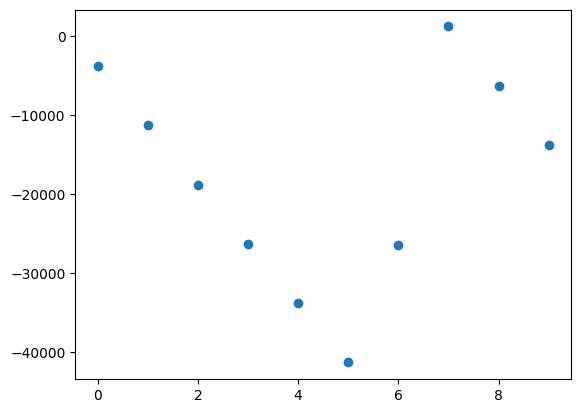

In [ ]:
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()

## Knowledge Graph JSON

In [ ]:
import pandas as pd
# json_file=pd.read_json("/content/wordnet_nodes_8b575cf667c29d233aeab354224aed03.data (2).json", lines=True)
json_file=pd.read_json("/content/items_691d502cfd0e0626cd3b058e5682ad1c.data.json", lines=True)

In [ ]:
json_file.columns

Index(['_key', '_id', '_rev', 'name', 'material', 'n_legs', 'dimension',
       'shape', 'color', 'description', 'pos', 'features', 'embeddingConvE',
       'embeddingConvKB', 'embeddingTransE', 'embeddingTransR',
       'embeddingSimplE', 'embeddingDistMult', 'embeddingComplEx',
       'embeddingRotatE', 'embeddingRGCN', 'embeddingSAGE_RGCN',
       'embeddingRecurrentGNN', 'embeddingGIN', 'type'],
      dtype='object')

In [ ]:
"microwave" in list(json_file['_key'])

True

In [ ]:
embedding_types=[i for i in list(json_file.columns) if 'embedding' in i]
embedding_types

['embeddingConvE',
 'embeddingConvKB',
 'embeddingTransE',
 'embeddingTransR',
 'embeddingSimplE',
 'embeddingDistMult',
 'embeddingComplEx',
 'embeddingRotatE',
 'embeddingRGCN',
 'embeddingSAGE_RGCN',
 'embeddingRecurrentGNN',
 'embeddingGIN']

In [ ]:
#codice per sbloccare posizione di un oggetto preciso
json_file['pos'].loc[json_file['_key']=="table08"].values[0][0]


json_file['pos'].loc[json_file['name']=="mouse"].values[0]


[[6, 3]]

In [ ]:
len(json_file['embeddingTransE'].loc[json_file['name']=="table"].values[0])


384

In [ ]:
json_file['pos'].loc[json_file['name']=='bottle']

df1_to_concat=pd.DataFrame([{"_key":"cup","name":"cup","pos":[[10,1],[9,1]]},{"_key":"Dylan's cup","name":"cup","pos":[[3,0]]},
 {"_key":"microwave","name":"microwave","pos":[[10,1],[9,1]]}])
json_file=pd.concat([json_file,df1_to_concat],ignore_index=True)
json_file

,_key,_id,_rev,name,material,n_legs,dimension,shape,color,description,...,embeddingTransR,embeddingSimplE,embeddingDistMult,embeddingComplEx,embeddingRotatE,embeddingRGCN,embeddingSAGE_RGCN,embeddingRecurrentGNN,embeddingGIN,type
0,table01,items/table01,_h7_vCCC---,desk,wood,2.0,big,rectangular,brown,piece furniture used working studying typicall...,...,"[0.8550257086753841, 0.9154920578002931, -0.73...","[1.177765607833862, 1.143533945083618, 0.09300...","[1.149431347846984, 1.251692175865173, -0.0591...","[1.19609797000885, 1.291028380393982, 0.166640...","[7.422672933898866e-05, -0.010899824090301, -0...","[0.0015948626678430001, 0.0014779678313060001,...","[-0.02092170715332, 0.064170137047767, 0.07021...","[0.013094943016767, -0.023107456043362003, -0....","[-0.040373571217060006, -0.02307092025876, -0....",NaN
1,table02,items/table02,_h7_vCCm---,desk,wood,2.0,big,rectangular,brown,piece furniture used working studying typicall...,...,"[0.768434345722198, 0.841460525989532, -0.6506...","[0.6874865293502801, 1.19899320602417, -0.5734...","[0.689651548862457, 1.150053024291992, -0.4245...","[0.8260150551795961, 1.3460988998413081, -0.62...","[3.6754536267835654e-05, -0.008259702473878, 0...","[0.001175102661363, 0.001119736465625, 0.00022...","[0.0101298391819, 0.05951967835426301, 0.08923...","[0.012813875451683, -0.022234970703721, -0.006...","[-0.039994668215513, -0.022813020274043003, -0...",NaN
2,table03,items/table03,_h7_vCDS---,desk,wood,2.0,big,rectangular,brown,piece furniture used working studying typicall...,...,"[0.8267017006874081, 0.8865247964859001, -0.68...","[0.908113598823547, 1.051476836204528, -0.3773...","[0.833070874214172, 1.022673487663269, -0.2026...","[0.813856363296508, 1.195147395133972, -0.1164...","[-7.103147800080478e-05, -0.043804820626974, 0...","[0.00137201079633, 0.0011687092483040002, 0.00...","[-0.023530811071395003, 0.021502345800399003, ...","[0.010438585653901001, -0.013929626904428002, ...","[-0.03831422701478, -0.022562405094504003, -0....",NaN
3,table04,items/table04,_h7_vCDq---,desk,wood,2.0,big,rectangular,brown,piece furniture used working studying typicall...,...,"[0.8952558636665341, 0.9735140204429621, -0.75...","[0.9774277210235591, 1.49425733089447, 0.17095...","[0.9669744372367851, 1.417403936386108, 0.2126...","[0.99146568775177, 1.685611367225647, 0.411520...","[9.975525608751924e-05, -0.004754982888698, -7...","[0.0012710967566810002, 0.001114633167162, 0.0...","[-0.015224486589431001, 0.027945935726165, 0.0...","[0.010730778798460001, -0.014631059020757, -0....","[-0.038319021463394005, -0.022689944133162002,...",NaN
4,table05,items/table05,_h7_vCEK---,desk,wood,2.0,big,rectangular,brown,piece furniture used working studying typicall...,...,"[0.663808763027191, 0.8212448358535761, -0.569...","[0.8529671430587761, 1.091321945190429, -0.268...","[0.911642134189605, 1.019404888153076, -0.3518...","[1.185618996620178, 1.245741248130798, -0.3244...","[1.116000930778682e-05, 9.387305181007834e-05,...","[0.0012941443128510002, 0.0015349223976950002,...","[0.013142496347427, 0.011757403612136001, 0.07...","[0.01197594590485, -0.020618859678506, -0.0059...","[-0.039407968521118004, -0.023279663175344002,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,blackboard.n.01,items/blackboard.n.01,_h7_vDz2---,blackboard,NaN,NaN,NaN,NaN,NaN,sheet slate writing chalk,...,"[-0.183005973696708, -0.6854003071784971, 0.36...","[-0.46293759346008306, -0.222354412078857, 0.6...","[-0.400613337755203, -0.342495590448379, 0.572...","[-0.123076900839805, 0.019668877124786002, 0.6...","[-3.244925756007433e-05, 0.059523753821849004,...","[-0.00039145362097769976, 0.000291440490400418...","[-0.22940997779369302, -0.10270461440086301, -...","[0.005661324132233, -0.0008867601864039898, 0....","[-0.034663766622543, -0.016957722604274, -0.03...",NaN
292,sheet.n.06,items/sheet.n.06,_h7_vD0O---,sheet,NaN,NaN,NaN,NaN,NaN,flat artifact thin relative length 

## Yolo pre-processing of images

In [ ]:
views=['image_l','image_r','image_f']
list_labels=[]
discard_list=['remote','sports ball','knife','oven','airplane','clock','kite','person','refrigerator']
width,length=12,5
newgrid=np.array([{} for i in range(width) for j in range(length)]).reshape((width,length))
list_embeddings=[]
# newgrid sarà del tipo: newgrid [x] [y] [lista_labels], newgrid [x] [y] [lista_embedding]
for i in range(12):
  for j in range(5):
    list_labels=[]
    for point_of_view in views:
      try:
        image_data=pepper.map.grid[i][j][point_of_view]
        model = YOLO("yolov8m.pt")
        results = model.predict(image_data)
        list_item_detected=results[0].boxes.cls.tolist()
        list_probabilities=results[0].boxes.conf.tolist()
        list_names=[results[0].names[results[0].boxes.cls.tolist()[i]] for i in range(len(results[0].boxes.cls.tolist()))]
        for element in list_names:
          if element not in discard_list:
            list_labels.append(element)
      except ValueError: break
    newgrid[i][j]['labels']=list(set(list_labels))



0: 480x640 (no detections), 1664.9ms
Speed: 24.4ms preprocess, 1664.9ms inference, 17.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 tv, 1 laptop, 4 books, 1723.4ms
Speed: 2.2ms preprocess, 1723.4ms inference, 17.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 2 dining tables, 1140.9ms
Speed: 2.8ms preprocess, 1140.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)





0: 480x640 (no detections), 1728.3ms
Speed: 2.3ms preprocess, 1728.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sports ball, 1 bottle, 1 cup, 2 chairs, 2 tvs, 1 laptop, 4 books, 1129.0ms
Speed: 2.0ms preprocess, 1129.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 5 chairs, 1 dining table, 1137.2ms
Speed: 4.7ms preprocess, 1137.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)





0: 480x640 (no detections), 1109.4ms
Speed: 2.9ms

In [ ]:
# 'embeddingRGCN', 'embeddingTransE', 'embeddingDistMult',
#        'embeddingComplEx', 'embeddingRotatE', 'embeddingTransR',
#        'embeddingSimplE'
# for i in range(12):
#   for j in range(5):
#     for label in newgrid[i][j]['labels']:
#       if label=='dining table':
#         label='dining_table'
#       newgrid[i][j][label]=json_file['embeddingTransE'].loc[json_file['name']==label].values
# len(newgrid[0][0]['laptop'][0])

## QLearning with YOLO preprocessing

In [ ]:
from tqdm import tqdm
import cv2
from PIL import Image

Q_table=None
def p_yolo_qlearn(pepper=pepper,n_episodes=1000,max_iter_episode=1000,
                         exploration_proba=1,exploration_decreasing_decay=0.0007,
                         min_exploration_proba=0.01,gamma=0.99,lr=0.5,x_fin=12,
            y_fin=0,steps=1,see_evolution=False,startx=0,starty=0,object_to_search='chair'):
  global Q_table
  global steps_per_success_episode
  rewards_per_episode=[]
  steps_per_success_episode=[]
  Q_table=np.zeros(shape=(map.width,map.length,4))
  pepper=Robot(startx,starty,mymap)
  current_state_x=pepper.x
  current_state_y=pepper.y
  list_index_evolution=[0,int(n_episodes/3),int(n_episodes/2),int(2*n_episodes/3),n_episodes-1]
  first_pos_x=startx
  first_pos_y=starty
  reward=0
  avg_q_value_changes = []
  final_position_list=[]



  #we iterate over episodes
  for e in tqdm(range(n_episodes)):
      #we initialize the first state of the episode
      #for each epoch I need to put the robot at the start point and
      #to reset map. Now map has only originary obstacles and
      #there is no track of previous epoch's steps
      file=open('map.pkl','rb')
      resetmap=pickle.load(file)
      pepper=Robot(startx,starty,resetmap)
      current_state_x=startx
      current_state_y=starty
      nextstep_random=False
      nextstep_exploit=False
      done = False
      Q_table_prev = np.copy(Q_table)


      if e==n_episodes-1:
        see_evolution=True





      #sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      direction=['straight','left','right','back']
      for i in range(max_iter_episode):

          #if i in list_index_evolution:
            #print("Epoch: ",e," iteration: ",i," pepper: ", pepper.x,pepper.y)

          # we sample a float from a uniform distribution over 0 and 1
          # if the sampled flaot is less than the exploration proba
          #     the agent selects arandom action
          # else
          #     he exploits his knowledge using the bellman equation


          if np.random.uniform(0,1) < exploration_proba:

            #a random action should be taken by the robot
            #but it should be an allowed action which doesn't provoke an error
            #because of the not empty state of next position
            # we would like to explore, here stop has the same probability
            # of moving, at least for first stages we would like to
            # choose between movements

            direction=['straight','left','right','back']
            while nextstep_random == False:
                  nextstep_random=True
                  #print(direction,"iteration",i," epoch",e,"position",pepper.x,pepper.y,pepper.map.grid[1][0]['empty'])
                  chosen_direction=random.choice(direction)
                  action=direction.index(chosen_direction)
                  try:
                    first_pos_x=pepper.x
                    first_pos_y=pepper.y
                    pepper.move(chosen_direction,steps=1)
                    # print(pepper.x, pepper.y)
                    if action!=-1:
                      if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:", first_pos_x,pepper.x," y:",first_pos_y,pepper.y)
                    next_state_x,next_state_y = pepper.x,pepper.y

                  except ValueError:
                    nextstep_random=False
                    Q_table[pepper.x,pepper.y,action]=-100000
                    # we can update that he cannot go in that direction
                    # by removing it from the list
                    # this can help robot to be trapped in a loop
                    #direction.remove(chosen_direction)
            nextstep_random=False

          else:
            direction=['straight','left','right','back']
            while nextstep_exploit==False:
              #here we must return an allowed action, not just the argmax
              #for example it could happen that argmax is the index corresponding to
              #a movement towards to a not-empty state

                action = np.argmax(Q_table[pepper.x,pepper.y])
                #print(direction[action])
                nextstep_exploit=True
                try:
                  first_pos_x=pepper.x
                  first_pos_y=pepper.y
                  pepper.move(direction[action],steps=steps)
                  if action!=-1:
                     if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:",first_pos_x,pepper.x," y:",first_pos_y,pepper.y)

                  next_state_x,next_state_y = pepper.x,pepper.y

                except ValueError:
              #if it's a forbidden action I can update that value on Q-table into
              #a negative one and restart the while loop until the argmax allowed
              #action is returned
                  Q_table[pepper.x,pepper.y,action]=-100000
                  nextstep_exploit==False
            nextstep_exploit=False
          # track a random epoch to understand where robot has moved
          # if e==3*n_episodes/4:
            # print("position: ", pepper.x,pepper.y)
            # print("position: ", current_state_x, current_state_y, "  ",Q_table[current_state_x,current_state_y,:]
            #       , "next_action: ", np.argmax(Q_table[current_state_x,current_state_y,:]))

          # if see_evolution:
          #     print("Epoch number: ",e)

          #     clear_output(wait=True)
          #     pepper.map.print_map_new(robot_marker=True,x=pepper.y,y=pepper.x)
          #     plt.show()
          #     plt.pause(0.005)


          if object_to_search in newgrid[pepper.x][pepper.y]['labels']:
            # reward=n_episodes*max_iter_episode
            reward=100
            done=True
            steps_per_success_episode.append([e,i])
            final_position_list.append([pepper.x,pepper.y])
            # break
          else:
            reward=-1



          #print("current_state: ", (current_state_x,current_state_y), " next_state: ", (next_state_x,next_state_y))

          # We update our Q-table using the Q-learning iteration
          Q_table[current_state_x,current_state_y, action] = (1-lr) * Q_table[current_state_x,current_state_y, action] +lr*(reward + gamma*max(Q_table[next_state_x,next_state_y,:]))
          total_episode_reward = total_episode_reward + reward


          # If the episode is finished, we leave the for loop
          if done:
            break


          current_state_x,current_state_y= next_state_x,next_state_y


      avg_q_value_change = np.mean(np.abs(Q_table - Q_table_prev))
      avg_q_value_changes.append(avg_q_value_change)

      #We update the exploration proba using exponential decay formula
      exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
      rewards_per_episode.append(total_episode_reward)
      #to track the position at the end of each epoch
      # if i==(max_iter_episode-1):
      #   print("Epoch ", e, " final destination: ", pepper.x," ",pepper.y)
      # to track when destination is reached

  return rewards_per_episode, steps_per_success_episode,final_position_list

100%|██████████| 10000/10000 [00:15<00:00, 632.29it/s]


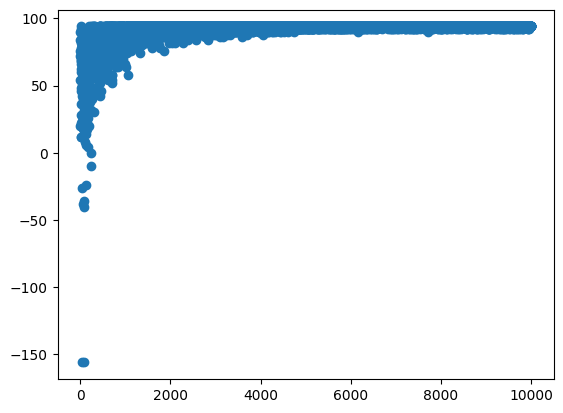

In [ ]:
rewards_per_episode,success,avg_q_value_changes=p_yolo_qlearn(n_episodes=10000,object_to_search='mouse',startx=11,starty=0)
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()

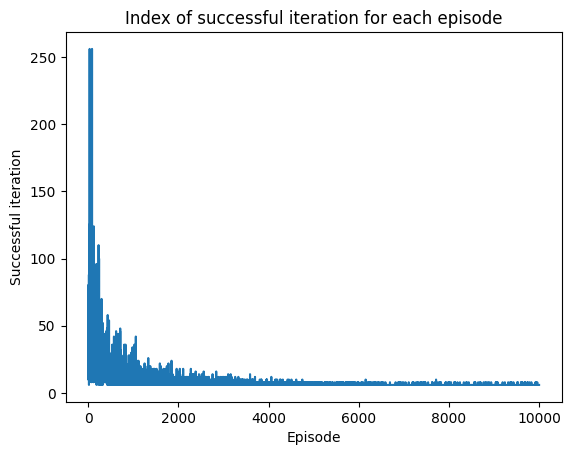

In [ ]:
index_ep=[i[0] for i in success]
index_success=[i[1] for i in success]
plt.title("Index of successful iteration for each episode")
plt.xlabel("Episode")
plt.ylabel("Successful iteration")
plt.plot(index_ep,index_success)

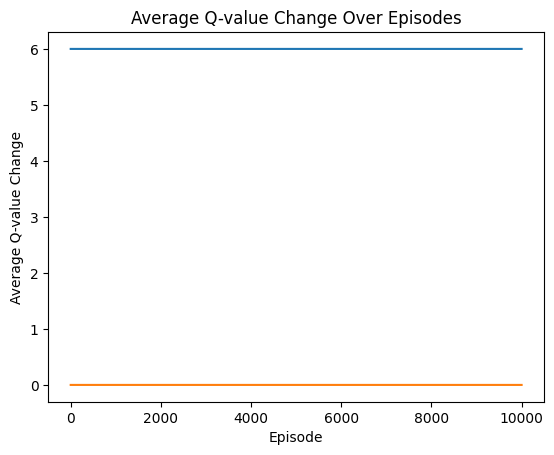

In [ ]:
plt.plot(range(len(avg_q_value_changes)), avg_q_value_changes)
plt.xlabel('Episode')
plt.ylabel('Average Q-value Change')
plt.title('Average Q-value Change Over Episodes')
plt.show()

In [ ]:
#l'index success è il numero di passi fatti e posso graficarlo con il numero dei passi ottimi (tramite Dijkstra)
# serve capire la posizione finale dell'oggetto richiesto
req_object='chair'
end_points=[]
for i in range(newgrid.shape[0]):
  for j in range(newgrid.shape[1]):
    if req_object in newgrid[i][j]['labels']:
      end_points.append((i,j))
end_points
#caso in cui oggetto ha più posizioni: si prende oggetto più vicino a partire da
#uno starting point (posizione iniziale del robot)
# if len(end_points)>1:
#   for tuple in end_points:


[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (7, 0),
 (8, 0),
 (10, 1)]

## Knowledge Graph Calls

In [ ]:
!pip install python-arango

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.6/110.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
from arango import ArangoClient


client= ArangoClient(hosts="")
db = client.db("", username="", password="")


db['items'].get_many(['table01'])

def get_emb_from_name(db=None,collection="items",attr="name",attr_value=None,emb_type="embeddingRGCN"):
    """Function getting an id from an attribute value"""
    if isinstance(collection,str):
        collection_name=collection
        collection=db[collection]
    else:
        collection_name=collection.name
    query = f"""For doc IN {collection_name} FILTER doc.{attr} == @attr_value RETURN doc.{emb_type}"""
    result = db.aql.execute(query, bind_vars={"attr_value":attr_value})
    x=[]
    for row in result:
        x.append(row)
    return x[0]


def get_pos_from_name(db=None,collection="items",attr="name",attr_value=None):
    """Function getting pos from an attribute value"""
    if isinstance(collection,str):
        collection_name=collection
        collection=db[collection]
    else:
        collection_name=collection.name
    query = f"""For doc IN {collection_name} FILTER doc.{attr} == @attr_value RETURN doc.{"pos"}"""
    result = db.aql.execute(query, bind_vars={"attr_value":attr_value})
    x=[]
    for row in result:
        x.append(row)
    return x[0]


get_emb_from_name(db=db,collection="items",attr="key",attr_value="table02",emb_type="embeddingRGCN")
get_pos_from_name(db=db,collection="items",attr="key",attr_value="table02")

ConnectionAbortedError: Can't connect to host(s) within limit (3)

## Q-Learning with embeddings

In [ ]:
!pip install torch

In [ ]:
len(list(json_file['embeddingRGCN']))

2059

In [ ]:
for i in range(json_file.shape[0]):
    assert(len(json_file['embeddingRGCN'])==2059)

In [ ]:
json_file['embeddingRGCN'].values[0]

[0.0005403301911428571,
 -0.00037739035906270146,
 -0.0001303335593547672,
 -0.0008284832001663744,
 0.0006525194621644914,
 -7.401718175970018e-05,
 -3.76404459530022e-05,
 -0.0002296139718964696,
 -6.403736188076438e-05,
 0.0005251211696304381,
 0.0009947932558134198,
 -0.0004386237123981118,
 0.00027369966846890753,
 4.584175621857866e-05,
 0.00044219705159775913,
 -0.0010623629204920002,
 -0.0007076995680108666,
 0.0004223701253067702,
 -6.304750968411099e-06,
 0.0009716943022795022,
 0.0006422314327210188,
 -7.261708378791809e-05,
 0.0003187070542480796,
 -0.0007413772400468588,
 -0.00013221528206486252,
 0.00019354977121111003,
 -0.0005147880292497575,
 0.0006841741851530969,
 -0.0001290118379984051,
 0.0008345397072844207,
 0.0002548156480770558,
 -0.0004465106758289039,
 -0.0003207899862900376,
 -0.00014452863251790402,
 -0.0002595335536170751,
 -0.0002517644315958023,
 0.00040514429565519094,
 -0.0004538508947007358,
 0.0003542277554515749,
 0.0002043784479610622,
 -0.00045647

In [ ]:
all_embeddings_list=np.array(json_file['embeddingSAGE']).reshape(json_file.shape[0],1)

from numpy.linalg import norm


reference_word='coffee_maker'
# reference_word="work.v.12"


threshold=0
similar_nodes=[]

for i in range(json_file.shape[0]):
  try:
    all_embeddings=np.array(all_embeddings_list[i])[0]
    reference=np.array(json_file['embeddingSAGE'].loc[json_file['name']==reference_word].values[0])
    cosine = np.dot(all_embeddings,reference)/(norm(all_embeddings)*norm(reference))
    if cosine>=threshold:
      if '.n.' not in json_file['_key'][i] and '.v.' not in json_file['_key'][i] and '.s.' not in json_file['_key'][i]:
        similar_nodes.append((cosine, json_file['_key'][i]))
  except: continue

similar_nodes_sorted=sorted(similar_nodes, key=lambda x: x[0], reverse=True)
similar_nodes_sorted[0:5]



# cosine = np.dot(A,B)/(norm(A)*norm(B))


[(1.0000000000000002, 'coffee_maker'),
 (0.9706651139184638, 'snack01'),
 (0.9677973047449956, 'blackboard'),
 (0.9557711529603978, 'drawers05'),
 (0.9549412751290333, 'printer')]

In [ ]:
list_names=[json_file['_key'][i] for i in range(json_file.shape[0]) if '.n.' in json_file['_key'][i]]
list_names

['boiler.n.01',
 'vessel.n.03',
 'auxiliary_boiler.n.01',
 'steam_whistle.n.01',
 'blackboard.n.01',
 'sheet.n.06',
 'bowl.n.01',
 'fishbowl.n.02',
 'jorum.n.01',
 'mazer.n.01',
 'toilet_bowl.n.01',
 'window.n.01',
 'framework.n.03',
 'bay_window.n.02',
 'casement_window.n.01',
 'clerestory.n.01',
 'display_window.n.01',
 'dormer.n.01',
 'dormer_window.n.01',
 'double-hung_window.n.01',
 'double_glazing.n.01',
 'fanlight.n.03',
 'lancet_window.n.01',
 'louvered_window.n.01',
 'oeil_de_boeuf.n.01',
 'picture_window.n.01',
 'pivoting_window.n.01',
 'porthole.n.01',
 'rose_window.n.01',
 'sash_window.n.01',
 'skylight.n.01',
 'sliding_window.n.01',
 'stained-glass_window.n.01',
 'storm_window.n.01',
 'transom.n.01',
 'casing.n.03',
 'mullion.n.01',
 'pane.n.01',
 'sash.n.01',
 'sash_fastener.n.01',
 'window_frame.n.01',
 'windowpane.n.01',
 'book.n.02',
 'product.n.02',
 'album.n.02',
 'coffee-table_book.n.01',
 'folio.n.03',
 'hardback.n.01',
 'journal.n.04',
 'notebook.n.01',
 'novel.n.

In [ ]:
json_file['embeddingRGCN'].loc[json_file['_key']==reference_word].values

array([list([0.00048613507533445954, -1.031991178024327e-05, -0.0003675651387311518, -7.942979573272169e-05, 0.0003589493571780622, 0.00021151154942344871, 6.38476776657626e-05, 0.00011998560512438411, -0.0001982988032978028, 6.245991244213656e-05, 0.0001461085339542478, 9.935757407220082e-05, -0.0001447882241336628, -1.82866624527378e-05, -2.48707383434521e-05, 0.00010300265421392389, -0.00014086040027905253, 0.00011062242992920801, -0.00028928459505550563, -0.0002195343840867281, -0.00010391890100436281, 0.0002112981746904552, -0.0002137618139386177, 5.680697358911858e-05, -0.0001985931739909574, -0.0001047947516781278, 0.0003015465917997062, 7.662842108402401e-06, -7.327867933781817e-06, 0.0002918880491051823, 0.000335900840582326, 0.00018310804443899542, 8.250269456766546e-05, -0.0001171317417174577, 0.0001212294373544864, 3.196644320269115e-05, -0.00010723386367317281, -2.8535756428027522e-05, 7.026515959296377e-05, -6.0798349295509986e-05, 0.0002119926502928137, -6.63605533191002

In [ ]:
json_file['pos'].loc[json_file['name']=="boiler"].values[0][0]

[9, 1]

In [ ]:
#Taking just embeddings
# reference_emb=torch.tensor(reference[0]["embedding"])
# all_embeddings = torch.stack([torch.tensor(item) for item in list(json_file['embeddingRGCN'])], dim=0)

# #Calculate similarities
# similarities = torch.nn.functional.cosine_similarity(reference_emb.unsqueeze(0), all_embeddings, dim=1)

# similar_nodes = []
# for doc, similarity in zip(all_docs,similarities):
#     if similarity > threshold_similarity:
#         similar_nodes.append((doc["key"],float(similarity)))
# similar_nodes_sorted=sorted(similar_nodes, key=lambda x: x[1], reverse=True)
# similar_nodes_sorted

In [ ]:
newgrid[6][0]['labels'].remove("mouse")
newgrid[5][0]['labels'].remove("mouse")
newgrid[6][0]['labels']

['bottle', 'book', 'dining table', 'tv', 'chair', 'laptop']

In [ ]:
newgrid[5][0]['labels'].remove("mouse")

In [ ]:
from tqdm import tqdm
import cv2
from PIL import Image
from numpy.linalg import norm


Q_table=None
#bisogna usare newgrid per sbloccare l'embedding degli oggetti visti in ogni punto della mappa
#per ognuno va fatta la cosine similarity con la richiesta
#inserire una threshold per considerare gli elementi con una certa cosinesimilarity
#fare una media degli oggetti che superano questa threshold
#dare un reward proporzionale a questa threshold
#l'epoca del qlearning termina se un oggetto con cosinesimilarity pari a 0.9 viene trovato
def embedding_qlearn(pepper=pepper,n_episodes=1000,max_iter_episode=1000,
                         exploration_proba=1,exploration_decreasing_decay=0.0007,
                         min_exploration_proba=0.01,gamma=0.99,lr=0.5,x_fin=12, newgrid=newgrid,
            y_fin=0,steps=1,see_evolution=False,startx=0,starty=0,object_to_search='chair', final_threshold=0.9,threshold=0.5, emb_type="embeddingTransE"):
  global Q_table
  global steps_per_success_episode
  rewards_per_episode=[]
  steps_per_success_episode=[]
  Q_table=np.zeros(shape=(map.width,map.length,4))
  pepper=Robot(startx,starty,mymap)
  current_state_x=pepper.x
  current_state_y=pepper.y
  list_index_evolution=[0,int(n_episodes/3),int(n_episodes/2),int(2*n_episodes/3),n_episodes-1]
  first_pos_x=startx
  first_pos_y=starty
  reward=0
  avg_q_value_changes = []
  emb_object=json_file[emb_type].loc[json_file['name']==object_to_search].values[0]
  final_position_list=[]




  #we iterate over episodes
  for e in tqdm(range(n_episodes)):
      #we initialize the first state of the episode
      #for each epoch I need to put the robot at the start point and
      #to reset map. Now map has only originary obstacles and
      #there is no track of previous epoch's steps
      file=open('map.pkl','rb')
      resetmap=pickle.load(file)
      pepper=Robot(startx,starty,resetmap)
      current_state_x=startx
      current_state_y=starty
      nextstep_random=False
      nextstep_exploit=False
      done = False


      if e==n_episodes-1:
        see_evolution=True





      #sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      direction=['straight','left','right','back']
      for i in range(max_iter_episode):

          #if i in list_index_evolution:
            #print("Epoch: ",e," iteration: ",i," pepper: ", pepper.x,pepper.y)

          # we sample a float from a uniform distribution over 0 and 1
          # if the sampled flaot is less than the exploration proba
          #     the agent selects arandom action
          # else
          #     he exploits his knowledge using the bellman equation


          if np.random.uniform(0,1) < exploration_proba:

            #a random action should be taken by the robot
            #but it should be an allowed action which doesn't provoke an error
            #because of the not empty state of next position
            # we would like to explore, here stop has the same probability
            # of moving, at least for first stages we would like to
            # choose between movements

            direction=['straight','left','right','back']
            while nextstep_random == False:
                  nextstep_random=True
                  #print(direction,"iteration",i," epoch",e,"position",pepper.x,pepper.y,pepper.map.grid[1][0]['empty'])
                  chosen_direction=random.choice(direction)
                  action=direction.index(chosen_direction)
                  try:
                    first_pos_x=pepper.x
                    first_pos_y=pepper.y
                    pepper.move(chosen_direction,steps=1)
                    # print(pepper.x, pepper.y)
                    if action!=-1:
                      if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:", first_pos_x,pepper.x," y:",first_pos_y,pepper.y)
                    next_state_x,next_state_y = pepper.x,pepper.y

                  except ValueError:
                    nextstep_random=False
                    Q_table[pepper.x,pepper.y,action]=-100000
                    # we can update that he cannot go in that direction
                    # by removing it from the list
                    # this can help robot to be trapped in a loop
                    #direction.remove(chosen_direction)
            nextstep_random=False

          else:
            direction=['straight','left','right','back']
            while nextstep_exploit==False:
              #here we must return an allowed action, not just the argmax
              #for example it could happen that argmax is the index corresponding to
              #a movement towards to a not-empty state

                action = np.argmax(Q_table[pepper.x,pepper.y])
                #print(direction[action])
                nextstep_exploit=True
                try:
                  first_pos_x=pepper.x
                  first_pos_y=pepper.y
                  pepper.move(direction[action],steps=steps)
                  if action!=-1:
                     if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:",first_pos_x,pepper.x," y:",first_pos_y,pepper.y)

                  next_state_x,next_state_y = pepper.x,pepper.y

                except ValueError:
              #if it's a forbidden action I can update that value on Q-table into
              #a negative one and restart the while loop until the argmax allowed
              #action is returned
                  Q_table[pepper.x,pepper.y,action]=-100000
                  nextstep_exploit==False
            nextstep_exploit=False
          # track a random epoch to understand where robot has moved
          # if e==3*n_episodes/4:
            # print("position: ", pepper.x,pepper.y)
            # print("position: ", current_state_x, current_state_y, "  ",Q_table[current_state_x,current_state_y,:]
            #       , "next_action: ", np.argmax(Q_table[current_state_x,current_state_y,:]))

          # if see_evolution:
          #     print("Epoch number: ",e)

          #     clear_output(wait=True)
          #     pepper.map.print_map_new(robot_marker=True,x=pepper.y,y=pepper.x)
          #     plt.show()
          #     plt.pause(0.005)


         #bisogna usare newgrid per sbloccare l'embedding degli oggetti visti in ogni punto della mappa
          #per ognuno va fatta la cosine similarity con la richiesta
          #inserire una threshold per considerare gli elementi con una certa cosinesimilarity
          #fare una media degli oggetti che superano questa threshold
          #dare un reward proporzionale a questa threshold
          #l'epoca del qlearning termina se un oggetto con cosinesimilarity pari a 0.9 viene trovato

          list_labels_per_position=newgrid[pepper.x][pepper.y]['labels']
          # sarà un array di dimensione n_feat x n_labels_trovate
          sum_cos_similarity=0
          n_items=0
          reward=-1

          #va fatta cosinesimilarity con l'oggetto da cercare
          for label in list_labels_per_position:
            if label=="dining table":
              label="dining_table"
            embedding=newgrid[pepper.x][pepper.y][label][0]
            #condizione di stop dell'epoca
            cos_sim=np.dot(embedding,emb_object)/(norm(embedding)*norm(emb_object))
            #print("COS",cos_sim)
            if cos_sim>=final_threshold:
                reward=100
                done=True
                final_position_list.append([pepper.x,pepper.y])
                break

            elif cos_sim >= threshold:
                sum_cos_similarity += cos_sim
                n_items += 1

            if not done and n_items > 0:
                reward = (sum_cos_similarity / n_items) / 1000

          total_episode_reward += reward
          #print("REWARD",reward)


          #print("current_state: ", (current_state_x,current_state_y), " next_state: ", (next_state_x,next_state_y))

          # We update our Q-table using the Q-learning iteration
          Q_table[current_state_x,current_state_y, action] = (1-lr) * Q_table[current_state_x,current_state_y, action] +lr*(reward + gamma*max(Q_table[next_state_x,next_state_y,:]))

          # If the episode is finished, we leave the for loop
          if done:
            steps_per_success_episode.append([e,i])
            break

          current_state_x,current_state_y= next_state_x,next_state_y

      #We update the exploration proba using exponential decay formula
      exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
      rewards_per_episode.append(total_episode_reward)
      #to track the position at the end of each epoch
      # if i==(max_iter_episode-1):
      #   print("Epoch ", e, " final destination: ", pepper.x," ",pepper.y)
      # to track when destination is reached

  return rewards_per_episode, steps_per_success_episode, final_position_list

In [ ]:
#OBJECT TO SEARCH:
# microwave with start 0,0
# mouse with start 11,1
import time
ex_time_list=[]





emb_list=["embeddingTransR", "embeddingComplEx", "embeddingRotatE", "embeddingRGCN","embeddingSAGE","embeddingTransE"]
emb_list=["embeddingRGCN","embeddingSAGE_RGCN","embeddingGIN","embeddingRecurrentGNN"]
emb_list=['embeddingConvE',
       'embeddingConvKB', 'embeddingTransE', 'embeddingTransR',
       'embeddingSimplE', 'embeddingDistMult', 'embeddingComplEx',
       'embeddingRotatE', 'embeddingRGCN', 'embeddingSAGE_RGCN',
       'embeddingRecurrentGNN', 'embeddingGIN']
emb_list=["embeddingRGCN", "embeddingSAGE_RGCN", "embeddingGIN" ,"embeddingRecurrentGNN"]

for emb_type in emb_list:
  #NEWGRID PRE-PROCESSING for type of embedding
  for i in range(12):
    for j in range(5):
      for label in newgrid[i][j]['labels']:
        if label=='dining table':
          label='dining_table'
        newgrid[i][j][label]=json_file[emb_type].loc[json_file['name']==label].values

  start_time = time.time()
  mouse_rewards_per_episode,mouse_success,mouse_final_pos=embedding_qlearn(object_to_search="mouse",startx=11,starty=0,emb_type=emb_type,newgrid=newgrid, final_threshold=0.98,threshold=0.9)
  end_time = time.time()
  execution_time = end_time - start_time
  ex_time_list.append(execution_time)

  # Creating subplots
  fig, axs = plt.subplots(2, 2, figsize=(15, 15))
  #REWARDS PLOT
  axs[0,0].plot([i for i in range(len(mouse_rewards_per_episode))],mouse_rewards_per_episode,'o')
  axs[0,0].set_xlabel("Episode")
  axs[0,0].set_ylabel("Cumulative reward")
  axs[0,0].set_title("Cumulative reward plot -"+emb_type+"  Q-Learning")

  #INDEX SUCCESS PLOT
  mouse_index_ep=[i[0] for i in mouse_success]
  mouse_index_success=[i[1] for i in mouse_success]
  axs[0,1].set_title("Index of successful iteration for episode- "+ emb_type+" Q-Learning")
  axs[0,1].set_xlabel("Episode")
  axs[0,1].set_ylabel("Successful iteration")
  axs[0,1].plot(mouse_index_ep,mouse_index_success)
  # plt.show()
  # Adjust layout
  plt.tight_layout()
  plt.show()

  #CHECK FINAL POSITION
  if len(mouse_final_pos)==len(mouse_index_success) and len(mouse_rewards_per_episode)==len(mouse_final_pos):
    final_df=pd.DataFrame({"final_pos":mouse_final_pos,"index_success":mouse_index_success,"rewards_per_episode":mouse_rewards_per_episode})

    colors = plt.cm.tab10.colors

    ax = final_df['final_pos'].value_counts().plot(kind='bar',color=colors[:len(final_df['final_pos'].value_counts())])
    # Ruotare le etichette sull'asse delle x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.ylabel("Occurrencies")
    plt.xlabel("Final position")
    plt.title("Occurrencies for final position- "+emb_type+"  Q-Learning")
    plt.show()


In [ ]:
comparison_time=dict(zip(emb_list,ex_time_list))

In [ ]:
final_pos

In [ ]:
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.title("Cumulative reward plot -"+emb_type"  Q-Learning")
plt.show()

In [ ]:
dict_final_pos={(lista[0],lista[1]) for lista in final_pos}
dict_final_pos


In [ ]:
index_ep=[i[0] for i in success]
index_success=[i[1] for i in success]
plt.title("Index of successful iteration for each episode- "+ emb_type" Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Successful iteration")
plt.plot(index_ep[800:],index_success[800:])

In [ ]:
final_df=pd.DataFrame({"final_pos":final_pos,"index_success":index_success,"rewards_per_episode":rewards_per_episode})
final_df

In [ ]:
colors = plt.cm.tab10.colors

ax = final_df['final_pos'].value_counts().plot(kind='bar',color=colors[:len(final_df['final_pos'].value_counts())])
# Ruotare le etichette sull'asse delle x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel("Occurrencies")
plt.xlabel("Final position")
plt.title("Occurrencies for final position- "+emb_type"  Q-Learning")

## Q-Learning algorithm for Navigation

Notes:
- initialize map with obstacles as pickle object and then load it to be a parameter of Robot object
- Q-Learning algorithm from the (0,0) to the door [without images]
- Use of depth images as estimation of distance: rewards are going to be inversely proportional to remaining distance from the destination
- Use of images for dynamic obstacles

In [ ]:
def reward_function(goal_x,goal_y,state_x,state_y):
  return  1 - ((abs(goal_x - state_x) + abs(goal_y - state_y)) / (goal_x + goal_y))


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
Q_table=None
def qlearn(pepper=pepper,n_episodes=1000,max_iter_episode=1000,
                         exploration_proba=1,exploration_decreasing_decay=0.0007,
                         min_exploration_proba=0.01,gamma=0.99,lr=0.5,x_fin=12,
            y_fin=0,steps=1,see_evolution=False,startx=0,starty=0):
  global Q_table
  global steps_per_success_episode
  rewards_per_episode=[]
  steps_per_success_episode=[]
  Q_table=np.zeros(shape=(map.width,map.length,4))
  pepper=Robot(startx,starty,mymap)
  current_state_x=pepper.x
  current_state_y=pepper.y
  list_index_evolution=[0,int(n_episodes/3),int(n_episodes/2),int(2*n_episodes/3),n_episodes-1]
  first_pos_x=startx
  first_pos_y=starty
  reward=0
  avg_q_value_changes = []




  #we iterate over episodes
  for e in tqdm(range(n_episodes)):
      #we initialize the first state of the episode
      #for each epoch I need to put the robot at the start point and
      #to reset map. Now map has only originary obstacles and
      #there is no track of previous epoch's steps
      file=open('map.pkl','rb')
      resetmap=pickle.load(file)
      pepper=Robot(startx,starty,resetmap)
      current_state_x=startx
      current_state_y=starty
      nextstep_random=False
      nextstep_exploit=False
      done = False
      Q_table_prev = np.copy(Q_table)


      # if e==n_episodes-1:
      #   see_evolution=True





      #sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      direction=['straight','left','right','back']
      for i in range(max_iter_episode):

          #if i in list_index_evolution:
            #print("Epoch: ",e," iteration: ",i," pepper: ", pepper.x,pepper.y)

          # we sample a float from a uniform distribution over 0 and 1
          # if the sampled flaot is less than the exploration proba
          #     the agent selects arandom action
          # else
          #     he exploits his knowledge using the bellman equation


          if np.random.uniform(0,1) < exploration_proba:

            #a random action should be taken by the robot
            #but it should be an allowed action which doesn't provoke an error
            #because of the not empty state of next position
            # we would like to explore, here stop has the same probability
            # of moving, at least for first stages we would like to
            # choose between movements

            direction=['straight','left','right','back']
            while nextstep_random == False:
                  nextstep_random=True
                  #print(direction,"iteration",i," epoch",e,"position",pepper.x,pepper.y,pepper.map.grid[1][0]['empty'])
                  chosen_direction=random.choice(direction)
                  action=direction.index(chosen_direction)
                  try:
                    first_pos_x=pepper.x
                    first_pos_y=pepper.y
                    pepper.move(chosen_direction,steps=1)
                    # print(pepper.x, pepper.y)
                    if action!=-1:
                      if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:", first_pos_x,pepper.x," y:",first_pos_y,pepper.y)
                    next_state_x,next_state_y = pepper.x,pepper.y

                  except ValueError:
                    nextstep_random=False
                    Q_table[pepper.x,pepper.y,action]=-100000
                    # we can update that he cannot go in that direction
                    # by removing it from the list
                    # this can help robot to be trapped in a loop
                    #direction.remove(chosen_direction)
            nextstep_random=False

          else:
            direction=['straight','left','right','back']
            while nextstep_exploit==False:
              #here we must return an allowed action, not just the argmax
              #for example it could happen that argmax is the index corresponding to
              #a movement towards to a not-empty state

                action = np.argmax(Q_table[pepper.x,pepper.y])
                #print(direction[action])
                nextstep_exploit=True
                try:
                  first_pos_x=pepper.x
                  first_pos_y=pepper.y
                  pepper.move(direction[action],steps=steps)
                  if action!=-1:
                     if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:",first_pos_x,pepper.x," y:",first_pos_y,pepper.y)

                  next_state_x,next_state_y = pepper.x,pepper.y

                except ValueError:
              #if it's a forbidden action I can update that value on Q-table into
              #a negative one and restart the while loop until the argmax allowed
              #action is returned
                  Q_table[pepper.x,pepper.y,action]=-100000
                  nextstep_exploit==False
            nextstep_exploit=False
          #track a random epoch to understand where robot has moved
          # if e==3*n_episodes/4:
            # print("position: ", pepper.x,pepper.y)
            # print("position: ", current_state_x, current_state_y, "  ",Q_table[current_state_x,current_state_y,:]
            #       , "next_action: ", np.argmax(Q_table[current_state_x,current_state_y,:]))

          if see_evolution:
              print("Epoch number: ",e)

              clear_output(wait=True)
              pepper.map.print_map_new(robot_marker=True,x=pepper.y,y=pepper.x)
              plt.show()
              plt.pause(0.005)




          if pepper.x==x_fin and pepper.y==y_fin: #position of the door (our final stage)
            reward=100
            done=True
            steps_per_success_episode.append([e,i])
            # break
          else:
            reward=-1


          #print("current_state: ", (current_state_x,current_state_y), " next_state: ", (next_state_x,next_state_y))

          # We update our Q-table using the Q-learning iteration
          Q_table[current_state_x,current_state_y, action] = (1-lr) * Q_table[current_state_x,current_state_y, action] +lr*(reward + gamma*max(Q_table[next_state_x,next_state_y,:]))
          total_episode_reward = total_episode_reward + reward

          # If the episode is finished, we leave the for loop
          if done:
            break


          current_state_x,current_state_y= next_state_x,next_state_y

      avg_q_value_change = np.mean(np.abs(Q_table - Q_table_prev))
      avg_q_value_changes.append(avg_q_value_change)

      #We update the exploration proba using exponential decay formula
      exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
      rewards_per_episode.append(total_episode_reward)
      #to track the position at the end of each epoch
      # if i==(max_iter_episode-1):
      #   print("Epoch ", e, " final destination: ", pepper.x," ",pepper.y)
      # to track when destination is reached

  return rewards_per_episode, steps_per_success_episode,avg_q_value_changes

100%|██████████| 1000/1000 [00:02<00:00, 453.29it/s]


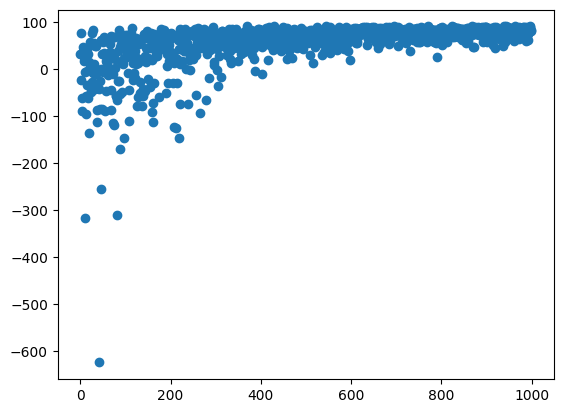

100%|██████████| 1000/1000 [00:02<00:00, 462.24it/s]


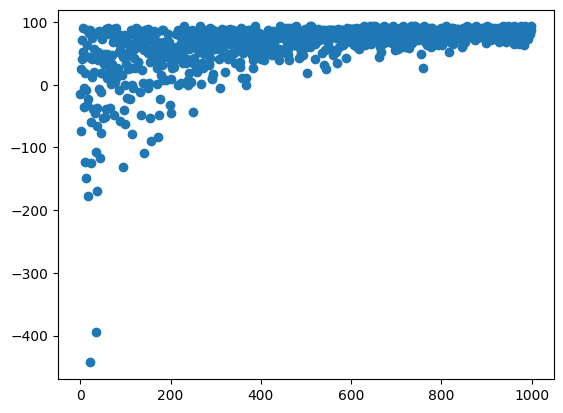

In [ ]:
rewards_per_episode,success,qvalue=qlearn(x_fin=10,y_fin=1)
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()
rewards_per_episode,success,qvalue=qlearn(x_fin=3,y_fin=0,startx=10,starty=1)
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()

## COMPARISONS
###Microwave

100%|██████████| 1000/1000 [00:04<00:00, 228.33it/s]


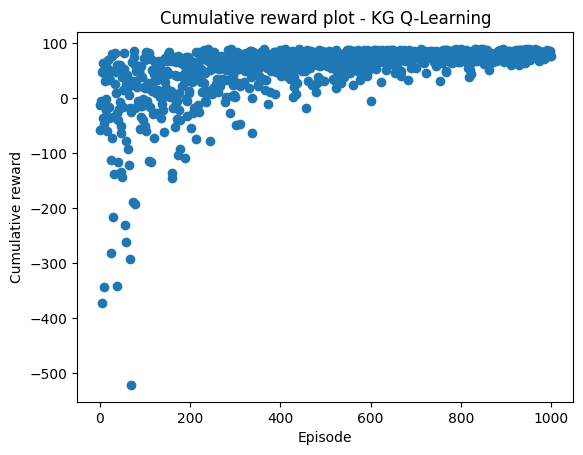

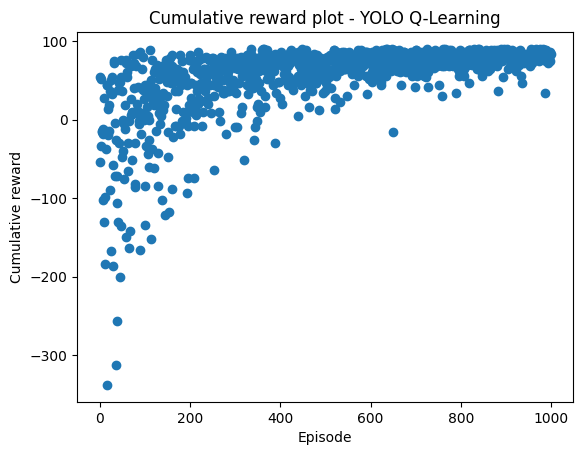

NameError: name 'mouse_index_ep' is not defined

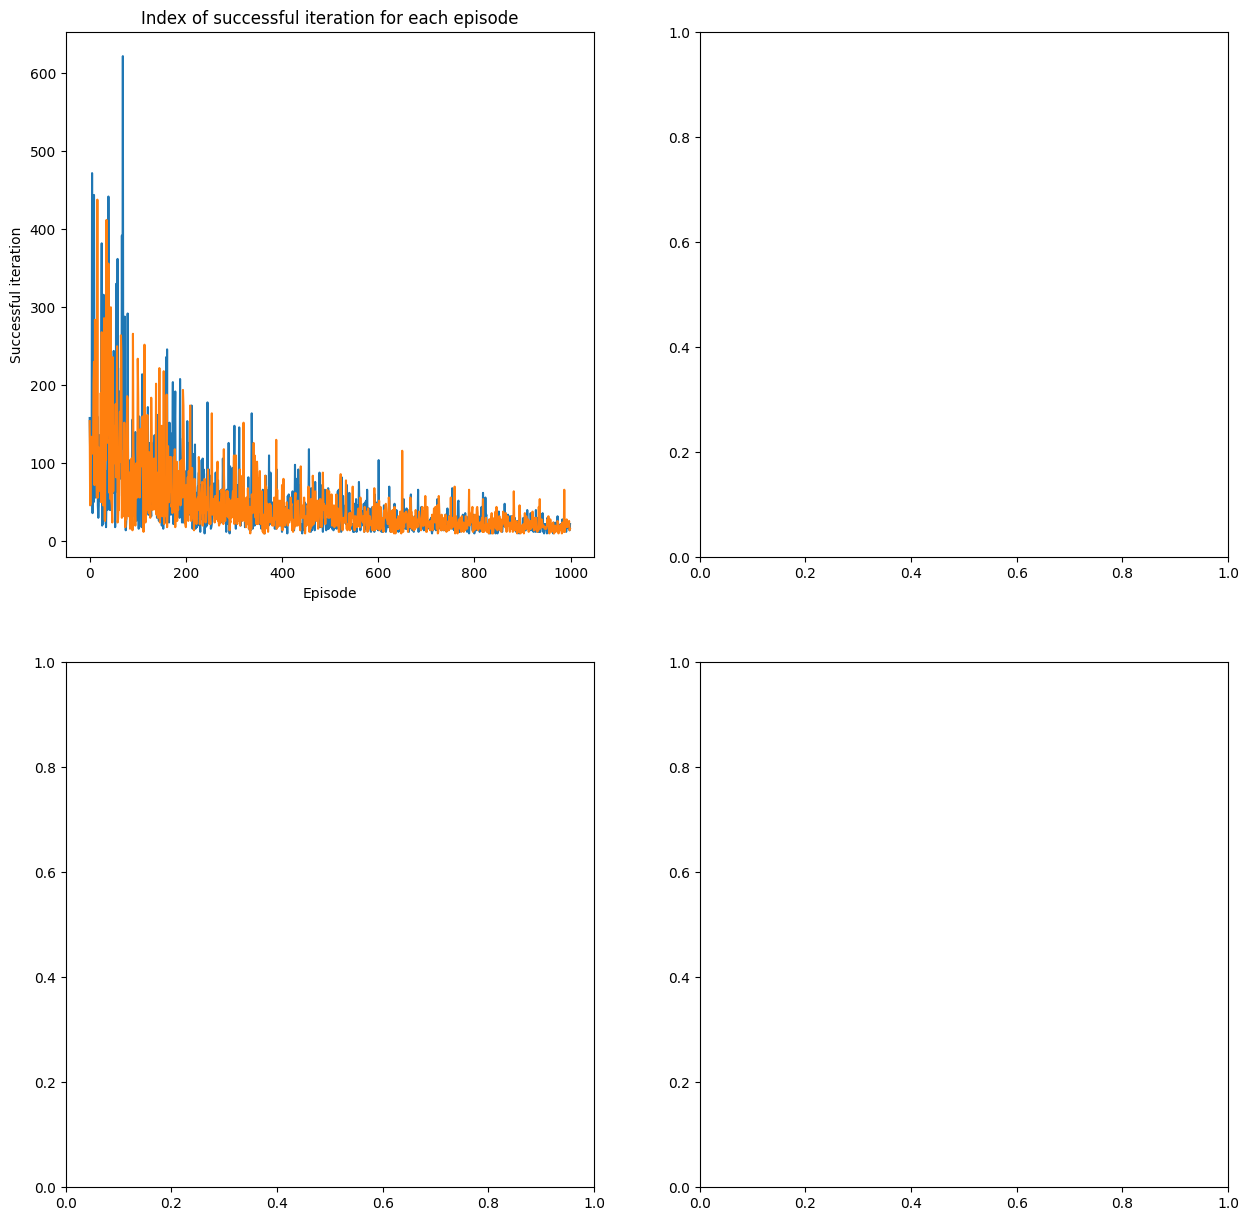

In [ ]:
import time
object_to_search="microwave"
ex_time_mic=[]

# x_fin=json_file['pos'].loc[json_file['name']=="microwave"].values[1][0][0]
# y_fin=json_file['pos'].loc[json_file['name']=="microwave"].values[1][0][1]

start_time = time.time()
rewards_per_episode,success,qvalue=qlearn(x_fin=10, y_fin=1)
end_time = time.time()

start_time_y=time.time()
rewards_per_episode_y,success_y,final_pos_y=p_yolo_qlearn(object_to_search=object_to_search)
end_time_y=time.time()
ex_time_mic.append(start_time_y-end_time_y-(start_time-end_time))

plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.title("Cumulative reward plot - KG Q-Learning")
plt.show()

plt.plot([i for i in range(len(rewards_per_episode_y))],rewards_per_episode_y,'o')
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.title("Cumulative reward plot - YOLO Q-Learning")
plt.show()



# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

index_ep=[i[0] for i in success]
index_success=[i[1] for i in success]
index_ep_y=[i[0] for i in success_y]
index_success_y=[i[1] for i in success_y]
axs[0,0].set_title("Index of successful iteration for each episode")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Successful iteration")
axs[0,0].plot(index_ep,index_success,label="KG Q-Learning")
axs[0,0].plot(index_ep_y,index_success_y,label="YOLO Q-Learning" )
axs[0,0].plot(mouse_index_ep,mouse_index_success,label="YOLO+KG Q-Learning")

axs[0,0].legend()





# arr1=np.array(index_success)
# arr2=np.array(index_success_y)
# delta_yolo=arr1-arr2 # se positivo meglio YOLO
# plt.title("Delta YOLO-KG QLearning of successful iteration index")
# plt.xlabel("Episodes")
# plt.ylabel("YOLO n_steps - KG n_steps")
# plt.plot(index_ep,delta_yolo)
# plt.show()


# plt.title("Delta YOLO-KG QLearning of successful iteration index(Zoomed)")
# plt.xlabel("Episodes")
# plt.ylabel("YOLO n_steps - KG n_steps")
# plt.plot(index_ep[800:],delta_yolo[800:])
# plt.show()

# rewards_mean=[np.mean(rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
# plt.plot([i for i in range(len(rewards_mean))],rewards_mean,label="KG Q-Learning")
# plt.title("Cumulative rewards mean per 100 episodes")
# plt.ylabel("Cumulative rewards mean")
# rewards_mean_y=[np.mean(rewards_per_episode_y[100*i:100*(i+1)]) for i in range(10)]
# plt.plot([i for i in range(len(rewards_mean_y))],rewards_mean_y,label="YOLO Q-Learning")
# mouse_rewards_mean=[np.mean(mouse_rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
# plt.plot([i for i in range(len(rewards_mean))],mouse_rewards_mean,label="YOLO+KG Q-Learning")
# plt.legend()
# plt.show()



rewards_mean=[np.mean(rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean))],rewards_mean,label="KG Q-Learning")
axs[0,1].set_title("Cumulative rewards mean per 100 episodes")
axs[0,1].set_ylabel("Cumulative rewards mean")
rewards_mean_y=[np.mean(rewards_per_episode_y[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean_y))],rewards_mean_y,label="YOLO Q-Learning")
mouse_rewards_mean=[np.mean(mouse_rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean))],mouse_rewards_mean,label="YOLO+KG Q-Learning")

axs[0,1].legend()
plt.tight_layout()
plt.show()

if len(final_pos_y)==len(index_success_y) and len(rewards_per_episode_y)==len(final_pos_y):
  final_df=pd.DataFrame({"final_pos":final_pos_y,"index_success":index_success_y,"rewards_per_episode":rewards_per_episode_y})

  colors = plt.cm.tab10.colors

  ax = final_df['final_pos'].value_counts().plot(kind='bar',color=colors[:len(final_df['final_pos'].value_counts())])
  # Ruotare le etichette sull'asse delle x
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  plt.ylabel("Occurrencies")
  plt.xlabel("Final position")
  plt.title("Occurrencies for final position- YOLO Q-Learning")
  plt.show()



100%|██████████| 1000/1000 [00:06<00:00, 145.67it/s]


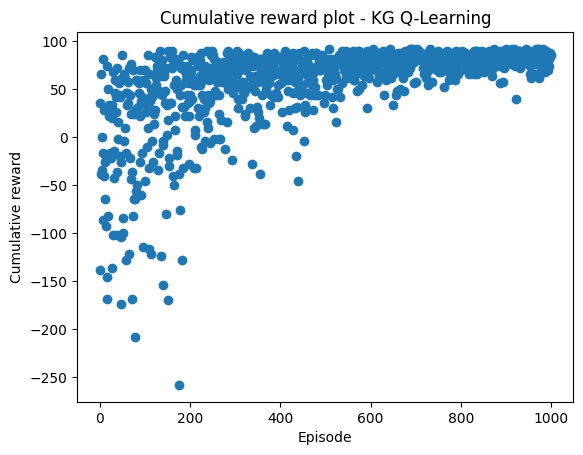

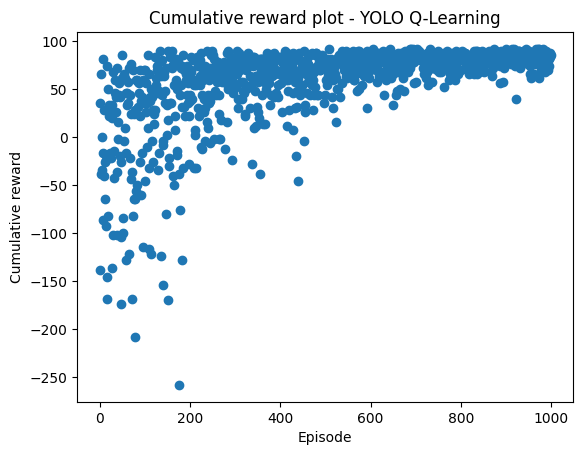

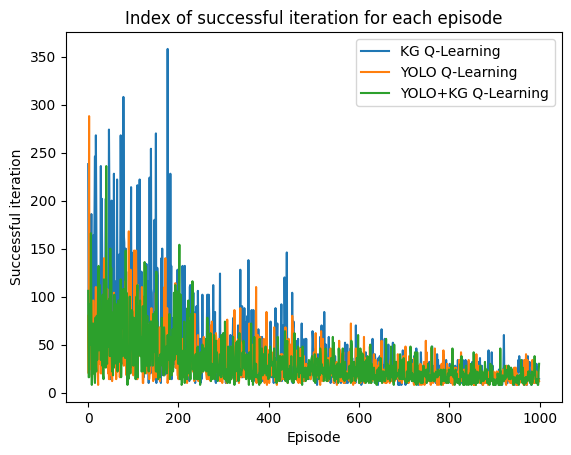

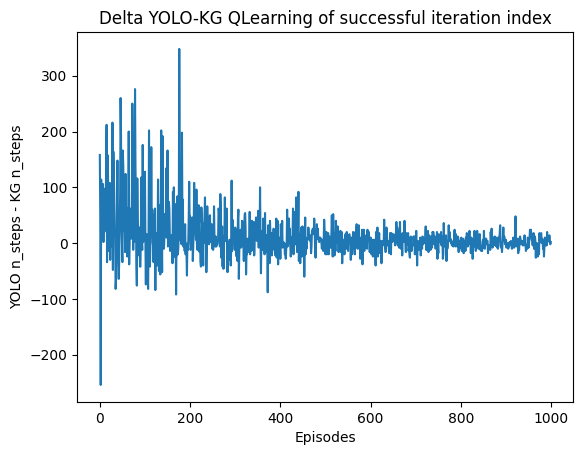

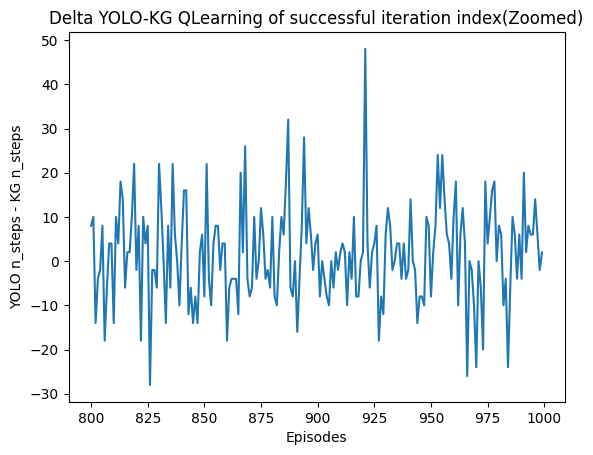

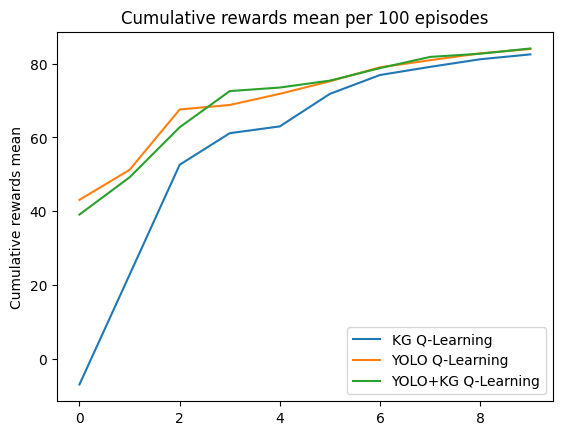

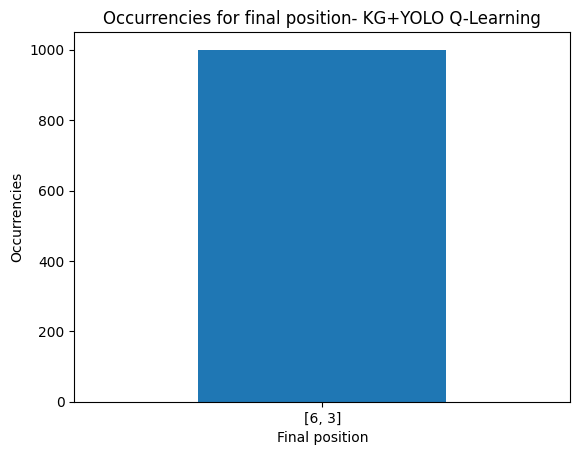

In [ ]:
import time
object_to_search="mouse"
ex_time_mouse=[]


x_fin=json_file['pos'].loc[json_file['name']==object_to_search].values[0][0][0]
y_fin=json_file['pos'].loc[json_file['name']==object_to_search].values[0][0][1]

start_time = time.time()
rewards_per_episode,success,qvalue=qlearn(x_fin=x_fin, y_fin=y_fin,startx=11,starty=1)
end_time = time.time()

start_time_y=time.time()
rewards_per_episode_y,success_y,final_pos_y=p_yolo_qlearn(object_to_search=object_to_search,startx=11,starty=1)
end_time_y=time.time()
ex_time_mouse.append(start_time_y-end_time_y-(start_time-end_time))

plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.title("Cumulative reward plot - KG Q-Learning")
plt.show()

plt.plot([i for i in range(len(rewards_per_episode_y))],rewards_per_episode,'o')
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.title("Cumulative reward plot - YOLO Q-Learning")
plt.show()



# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

index_ep=[i[0] for i in success]
index_success=[i[1] for i in success]
index_ep_y=[i[0] for i in success_y]
index_success_y=[i[1] for i in success_y]
axs[0,0].set_title("Index of successful iteration for each episode")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Successful iteration")
axs[0,0].plot(index_ep,index_success,label="KG Q-Learning")
axs[0,0].plot(index_ep_y,index_success_y,label="YOLO Q-Learning" )
axs[0,0].plot(mouse_index_ep,mouse_index_success,label="YOLO+KG Q-Learning")

axs[0,0].legend()






# arr1=np.array(index_success)
# arr2=np.array(index_success_y)
# delta_yolo=arr1-arr2 # se positivo meglio YOLO
# plt.title("Delta YOLO-KG QLearning of successful iteration index")
# plt.xlabel("Episodes")
# plt.ylabel("YOLO n_steps - KG n_steps")
# plt.plot(index_ep,delta_yolo)
# plt.show()


# plt.title("Delta YOLO-KG QLearning of successful iteration index(Zoomed)")
# plt.xlabel("Episodes")
# plt.ylabel("YOLO n_steps - KG n_steps")
# plt.plot(index_ep[800:],delta_yolo[800:])
# plt.show()

rewards_mean=[np.mean(rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean))],rewards_mean,label="KG Q-Learning")
axs[0,1].set_title("Cumulative rewards mean per 100 episodes")
axs[0,1].set_ylabel("Cumulative rewards mean")
rewards_mean_y=[np.mean(rewards_per_episode_y[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean_y))],rewards_mean_y,label="YOLO Q-Learning")
mouse_rewards_mean=[np.mean(mouse_rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
axs[0,1].plot([i for i in range(len(rewards_mean))],mouse_rewards_mean,label="YOLO+KG Q-Learning")

axs[0,1].legend()
plt.tight_layout()
plt.show()

lista=[[6,3] for i in range(len(mouse_index_success))]
if len(mouse_final_pos)==len(mouse_index_success) and len(mouse_rewards_per_episode)==len(mouse_final_pos):
  final_df=pd.DataFrame({"final_pos":lista,"index_success":mouse_index_success,"rewards_per_episode":mouse_rewards_per_episode})

  colors = plt.cm.tab10.colors

  ax = final_df['final_pos'].value_counts().plot(kind='bar',color=colors[:len(final_df['final_pos'].value_counts())])
  # Ruotare le etichette sull'asse delle x
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  plt.ylabel("Occurrencies")
  plt.xlabel("Final position")
  plt.title("Occurrencies for final position- KG+YOLO Q-Learning")
  plt.show()



100%|██████████| 1000/1000 [00:03<00:00, 253.93it/s]


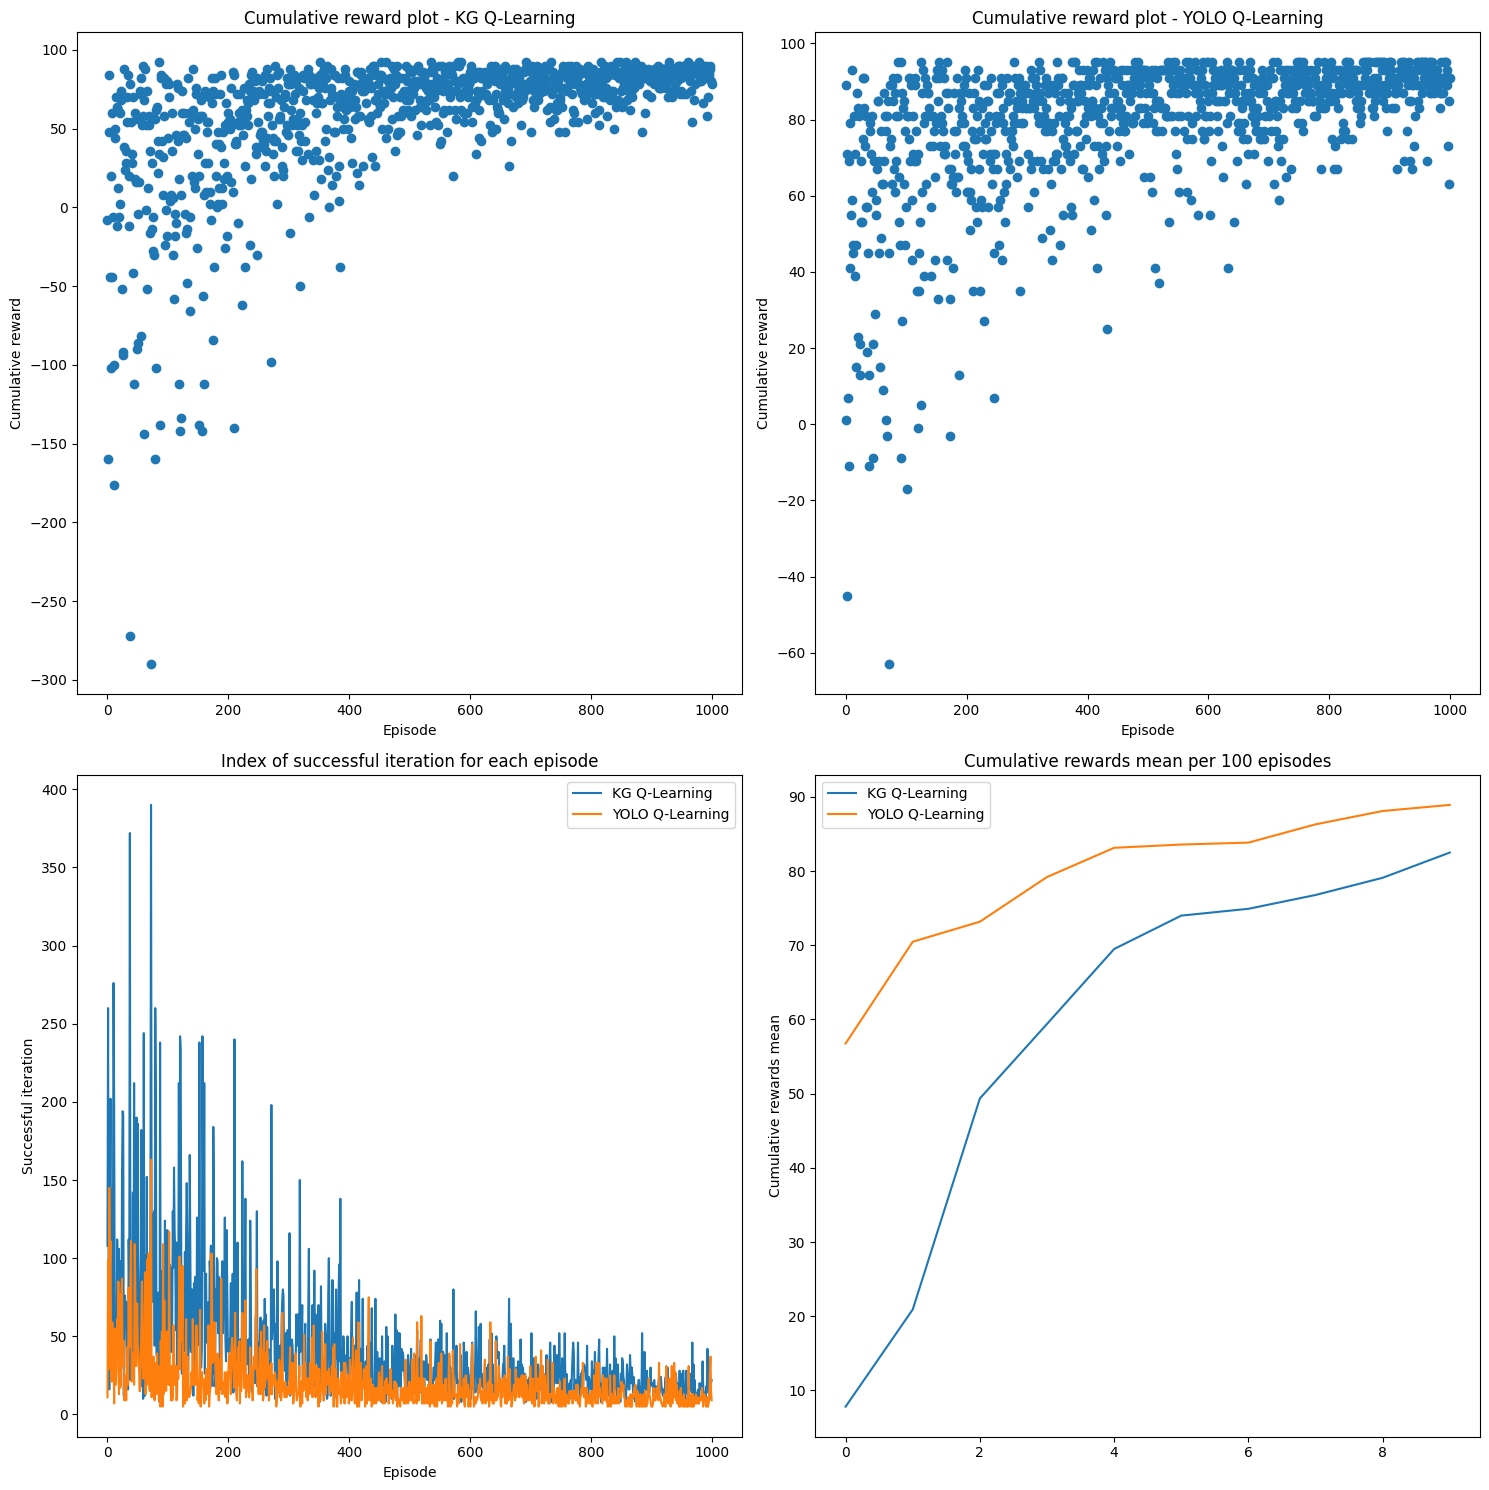

In [ ]:
import time
object_to_search="mouse"
ex_time_mouse=[]


x_fin=json_file['pos'].loc[json_file['name']==object_to_search].values[0][0][0]
y_fin=json_file['pos'].loc[json_file['name']==object_to_search].values[0][0][1]

start_time = time.time()
rewards_per_episode,success,qvalue=qlearn(x_fin=x_fin, y_fin=y_fin,startx=11,starty=1)
end_time = time.time()

start_time_y=time.time()
rewards_per_episode_y,success_y,final_pos_y=p_yolo_qlearn(object_to_search=object_to_search,startx=11,starty=1)
end_time_y=time.time()
ex_time_mouse.append(start_time_y-end_time_y-(start_time-end_time))

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Cumulative reward plot - KG Q-Learning
axs[0, 0].plot([i for i in range(len(rewards_per_episode))], rewards_per_episode, 'o')
axs[0, 0].set_xlabel("Episode")
axs[0, 0].set_ylabel("Cumulative reward")
axs[0, 0].set_title("Cumulative reward plot - KG Q-Learning")

# Plot 2: Cumulative reward plot - YOLO Q-Learning
axs[0, 1].plot([i for i in range(len(rewards_per_episode_y))], rewards_per_episode_y, 'o')
axs[0, 1].set_xlabel("Episode")
axs[0, 1].set_ylabel("Cumulative reward")
axs[0, 1].set_title("Cumulative reward plot - YOLO Q-Learning")

# Plot 3: Index of successful iteration for each episode
index_ep=[i[0] for i in success]
index_success=[i[1] for i in success]
index_ep_y=[i[0] for i in success_y]
index_success_y=[i[1] for i in success_y]
axs[1, 0].plot(index_ep, index_success, label="KG Q-Learning")
axs[1, 0].plot(index_ep_y, index_success_y, label="YOLO Q-Learning")
axs[1, 0].set_title("Index of successful iteration for each episode")
axs[1, 0].set_xlabel("Episode")
axs[1, 0].set_ylabel("Successful iteration")
axs[1, 0].legend()

# # Plot 4: Delta YOLO-KG QLearning of successful iteration index
# arr1 = np.array(index_success)
# arr2 = np.array(index_success_y)
# delta_yolo = arr1 - arr2
# axs[1, 1].plot(index_ep, delta_yolo)
# axs[1, 1].set_title("Delta YOLO-KG QLearning of successful iteration index")
# axs[1, 1].set_xlabel("Episodes")
# axs[1, 1].set_ylabel("YOLO n_steps - KG n_steps")

# # Plot 5: Delta YOLO-KG QLearning of successful iteration index (Zoomed)
# axs[2, 0].plot(index_ep[800:], delta_yolo[800:])
# axs[2, 0].set_title("Delta YOLO-KG QLearning of successful iteration index (Zoomed)")
# axs[2, 0].set_xlabel("Episodes")
# axs[2, 0].set_ylabel("YOLO n_steps - KG n_steps")

# Plot 6: Cumulative rewards mean per 100 episodes
rewards_mean = [np.mean(rewards_per_episode[100*i:100*(i+1)]) for i in range(10)]
rewards_mean_y = [np.mean(rewards_per_episode_y[100*i:100*(i+1)]) for i in range(10)]
axs[1, 1].plot([i for i in range(len(rewards_mean))], rewards_mean, label="KG Q-Learning")
axs[1, 1].plot([i for i in range(len(rewards_mean_y))], rewards_mean_y, label="YOLO Q-Learning")
axs[1, 1].set_title("Cumulative rewards mean per 100 episodes")
axs[1, 1].set_ylabel("Cumulative rewards mean")
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()



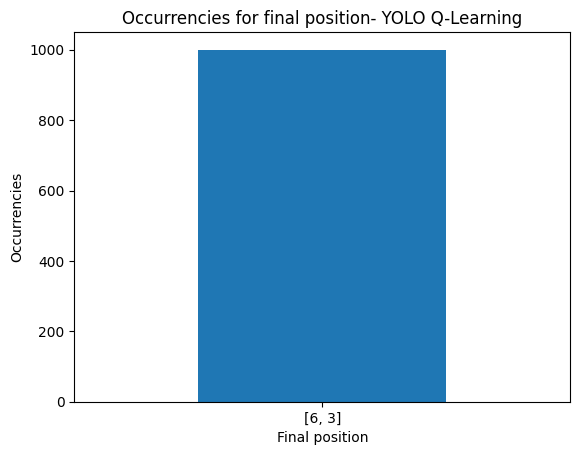

In [ ]:
final_pos_y=[[6,3] for i in range(len(index_success_y))]
if len(final_pos_y)==len(index_success_y) and len(rewards_per_episode_y)==len(final_pos_y):
  final_df=pd.DataFrame({"final_pos":final_pos_y,"index_success":index_success_y,"rewards_per_episode":rewards_per_episode_y})

  colors = plt.cm.tab10.colors

  ax = final_df['final_pos'].value_counts().plot(kind='bar',color=colors[:len(final_df['final_pos'].value_counts())])
  # Ruotare le etichette sull'asse delle x
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  plt.ylabel("Occurrencies")
  plt.xlabel("Final position")
  plt.title("Occurrencies for final position- YOLO Q-Learning")
  plt.show()


In [ ]:
ex_time_mic

[-0.384660005569458]

In [ ]:
ex_time_mouse

[0.3563206195831299]

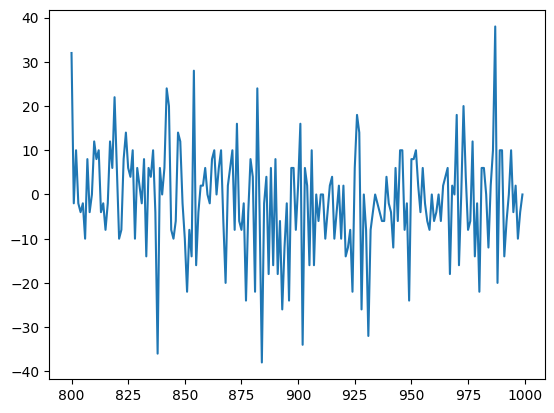

In [ ]:
arr1=np.array(index_success)
arr2=np.array(index_success_y)
delta_yolo=arr1-arr2 # se positivo meglio YOLO
plt.title("Delta YOLO-KG Q-Learning of successful iteration")
plt.xlabel("Episodes")
plt.ylabel("YOLO n_steps - KG n_steps")
plt.plot(index_ep,delta_yolo)
plt.show()

In [ ]:
np.argmax(Q_table,axis=2)

array([[0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [0, 2, 1, 2, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [ ]:
rewards_mean=[np.mean(rewards_per_episode[100*i:100*(i+1)]) for i in range 10]
plt.plot(rewards_mean,len(rewards_mean))
plt.ylabel("Cumulative rewards mean per 100 episodes")
plt.show()

Mean reward per hundred episodes
100 : mean episode reward:  -24308.74
200 : mean episode reward:  -21611.03
300 : mean episode reward:  -15852.69
400 : mean episode reward:  -18119.45
500 : mean episode reward:  -15627.63
600 : mean episode reward:  -14164.73
700 : mean episode reward:  -14780.82
800 : mean episode reward:  -11790.52
900 : mean episode reward:  -9790.69
1000 : mean episode reward:  -11235.88
1100 : mean episode reward:  nan
1200 : mean episode reward:  nan
1300 : mean episode reward:  nan
1400 : mean episode reward:  nan
1500 : mean episode reward:  nan
1600 : mean episode reward:  nan
1700 : mean episode reward:  nan
1800 : mean episode reward:  nan
1900 : mean episode reward:  nan
2000 : mean episode reward:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


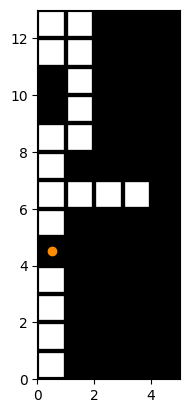

100%|██████████| 20000/20000 [01:02<00:00, 322.20it/s]


Mean reward per hundred episodes
100 : mean episode reward:  1305.34
200 : mean episode reward:  1602.22
300 : mean episode reward:  1755.12
400 : mean episode reward:  1935.18
500 : mean episode reward:  2007.35
600 : mean episode reward:  2094.18
700 : mean episode reward:  2615.25
800 : mean episode reward:  2403.55
900 : mean episode reward:  2252.51
1000 : mean episode reward:  1773.67
1100 : mean episode reward:  2288.21
1200 : mean episode reward:  1743.47
1300 : mean episode reward:  1963.94
1400 : mean episode reward:  2435.54
1500 : mean episode reward:  1758.52
1600 : mean episode reward:  1834.9
1700 : mean episode reward:  1790.92
1800 : mean episode reward:  1670.37
1900 : mean episode reward:  1505.68
2000 : mean episode reward:  1876.94


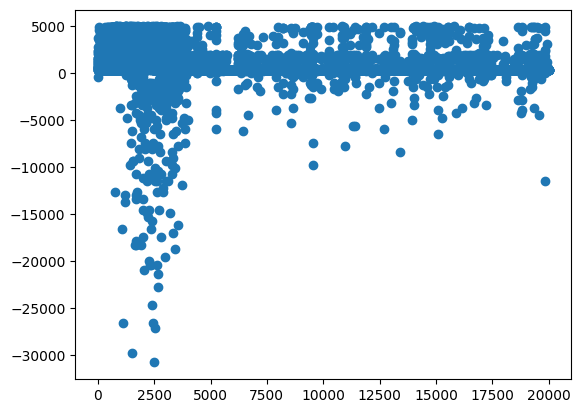

In [ ]:
rewards_per_episode=qlearn(n_episodes=20000,lr=0.6,exploration_decreasing_decay=0.001,x_fin=4,y_fin=0)
print("Mean reward per hundred episodes")
for i in range(20):
    print((i+1)*100,": mean episode reward: ",
           np.mean(rewards_per_episode[100*i:100*(i+1)]))
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()


In [ ]:
len(steps_per_success_episode)

20000

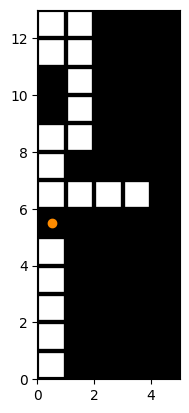

In [ ]:
with open('map.pkl', 'rb') as file:

    # Call load method to deserialze
    violettemap = pickle.load(file)
violette=Robot(0,0,violettemap)
#dynamic plot: i want to realize a plot that updates at each iteration
#robot's position into the map
for i in range(5):
  violette.move_straight()
  clear_output(wait=True)
  violette.map.print_map_new(robot_marker=True,x=violette.y,y=violette.x)
  plt.show()
  plt.pause(0.5)
# plt.show()

## Application: 10cm^2 pixel

- moltiplicare dimensioni mappa*10
- il robot avrà una sua shape ed un suo centro, quindi quando si muove devo aggiornare il suo centro
- creare una regione di safety del robot: centro+- 0.5 (larghezza del robot) +- 0.1m (safety distance)
- funzione movement deve ritornare un booleano per dire se è nella regione di safety (a 0.1m non c'è ostacolo nè a destra nè a sx nè dietro nè davanti) oppure no
- reward cambiano se nella regione di safety o no: più bassi se robot non è nella regione di safety

### Generalized class and movement function
In this applicaton with 1cm^2 pixel, we should apply some modifications:

- create a new boolean attribute for robot in safe zone
- movement function creates movement not just for a point but for a region of robot's shape
- movement function should check every pixel inside and outside the safe zone for obstacles


### New map definition

In [ ]:
from tqdm import tqdm
MAP_EMPTY = 0
MAP_IMAGE_F = 1
MAP_IMAGE_b = 2
MAP_IMAGE_l = 3
MAP_IMAGE_r = 4

empty_grid = [True,
    np.zeros([1,1]),
    np.zeros([1,1]),
    np.zeros([1,1]),
    np.zeros([1,1])
]

def create_grid(width,length):
    grid=np.array([list(empty_grid) for i in range(width) for j in range(length)], dtype=object).reshape((width,length, -1))
    return grid



class Map:
    def __init__(self,width,length):
        self.length=length
        self.width=width
        self.grid=create_grid(self.width,self.length)



        #grid is width x length x 5 (state and the 4 images to analyze)
        #
        #grid:
        #           x
        #              - - - - -length - - - - -> y
        #     width |  0   1 2 3 4 5 6 7 8
        #           |  1
        #           |  2
        #           |  3
        #           V
        # i dedice this convention about the angle theta:
        # if in 0,0 he cannot move back, as depicted in the map
        # left is in the positive direction of y-axis
        #

    def initial_position(self,first_x,first_y,safety_region=False):
        if first_x<0 or first_x>=self.width:
            check=False
        elif first_y<0 or first_y>=self.length:
            check=False
        else:
            check=True
        return check

    def print_map(self,x=0,y=0,robot_marker=False):
        # Print the map using matplotlib
        plt.figure(figsize=(self.width, self.length))

        gridstates=np.zeros([self.width,self.length])
        for ind_width in range(self.grid.shape[0]):
          for ind_length in range(self.grid.shape[1]):
            gridstates[self.width-1-ind_width][ind_length]=self.grid[ind_width,ind_length,0]

        # gridstates=np.rot90(gridstates)
        # print(gridstates)


        # Plot the map
        for i in range(self.width):
          for j in range(self.length):
              # if gridstates[i][j]:
                  plt.plot([j, j+1, j+1, j, j], [i, i, i+1, i+1, i], 'k-', linewidth=3)

        plt.imshow(gridstates, cmap='gray',interpolation='nearest', extent=[0, self.length, 0, self.width])
        if robot_marker:
          plt.scatter(x+0.5,y+0.5,color='darkorange')

    def print_map_new(self,x=0,y=0,robot_marker=False):
        # Print the map using matplotlib
        fig, ax = plt.subplots()


        # ax.figure(figsize=(self.width, self.length))

        gridstates=np.zeros([self.width,self.length])
        for ind_width in range(self.grid.shape[0]):
          for ind_length in range(self.grid.shape[1]):
            gridstates[self.width-1-ind_width][ind_length]=self.grid[ind_width][ind_length][0]

        # gridstates=np.rot90(gridstates)
        # print(gridstates)


        # Plot the map

        for i in range(self.width):
          for j in range(self.length):
              # if gridstates[i][j]:
                  ax.plot([j, j+1, j+1, j, j], [i, i, i+1, i+1, i], 'k-', linewidth=3)

        ax.imshow(gridstates, cmap='gray',interpolation='nearest', extent=[0, self.length, 0, self.width])
        if robot_marker:
          ax.scatter(x+0.5,y+0.5,color='darkorange')

        fig.canvas.draw()

    def add_obstacle(self,width_x,width_y):
          self.grid[width_x][width_y][0]=False





class Robot:
    def __init__(self, x, y,_map, xshape_robot=3,y_shaperobot=3,safeborder=2,safety_region=False):
      # i need to give an initial position to the robot
      # i need to check if initial position is an allowed one
      # i call initial_position method of class Map to return a boolean that initializes or ask again for initialization (in case of invalid coordinates)
      self.x=x
      self.y=y
      self.map=_map
      self.xshape=xshape_robot
      self.yshape=y_shaperobot
      # I create an attribute to say if the robot is in safe zone (no obstacle close to him)
      self.safeborder=safeborder
      self.safety_region=safety_region

      initial_check=self.map.initial_position(x,y,self.safety_region)
      if initial_check==False:
        raise ValueError("Invalid coordinates")
      #if the position is allowed i have to update the empty from True to False in the corresponding element of grid

      #if safety region is True, robot is a region of pixel and we should take robot's shape into account
      if self.safety_region:
        border_x_pos=self.x+self.xshape
        border_y_pos=self.y+self.yshape
        border_x_neg=self.x-self.xshape
        border_y_neg=self.y-self.yshape
        if border_x_neg < 0 or border_y_neg < 0 or border_x_pos>=self.map.width or border_y_pos>=self.map.length:
          raise ValueError("Invalid coordinates")

      self.map.grid[x][y][0]=False
      # I create an attribute to say if the robot should be in safe mode (obstacle close to him)
      # or not
      self.safe_mode=False


      #####

      # [robot]
      # . center of robot



  #                 NO SAFE MODE
  #            |------------------|
  #            |     safe mode    |
  #            |   [     |     ]  |
  #   NO SAFE  |   [---- . ----]  |  NO SAFE MODE
  #      MODE  |   [     |     ]  |
  #            |     safe mode    |
  #            |------------------|

                 #  NO SAFE MODE







    # def region_check(self):
    #   # this function generalizes the look for obstacles in safemode zone
    #   # and updates the safe_mode attribute if an obstacle is inside the
    #   # safemode zone
    #   self.safe_mode=False
    #   xshape_robot=self.xshape
    #   y_shaperobot=self.yshape
    #   safeborder=self.safeborder
    #   if self.x-xshape_robot-safeborder < 0 or self.y-y_shaperobot-safeborder < 0 or self.x+xshape_robot+safeborder>=self.map.width or self.y+y_shaperobot+safeborder>=self.map.length:
    #     self.safe_mode=False
    #     return
    #   if not(all(self.map.grid[self.x-xshape_robot-safeborder:self.x+xshape_robot+safeborder, self.y+y_shaperobot:self.y+y_shaperobot+safeborder,0])):
    #     self.safe_mode=True
    #   if not(all(self.map.grid[self.x-xshape_robot-safeborder:self.x+xshape_robot+safeborder, self.y-y_shaperobot:self.y-y_shaperobot-safeborder,0])):
    #     self.safe_mode=True
    #   if not(all(self.map.grid[self.x-xshape_robot-safeborder:self.x-xshape_robot, self.y+y_shaperobot:self.y-y_shaperobot,0])):
    #     self.safe_mode=True
    #   if not(all(self.map.grid[self.x+xshape_robot:self.x+xshape_robot+safeborder, self.y+y_shaperobot:self.y-y_shaperobot,0])):
    #     self.safe_mode=True

    # def check_robot_limits(self,x,y):
    #   # this function is useful for avoiding movement which are not allowed because of
    #   # the shape of robot
    #   flag=True
    #   border_x_pos=x+self.xshape
    #   border_y_pos=y+self.yshape
    #   border_x_neg=x-self.xshape
    #   border_y_neg=y-self.yshape
    #   if border_x_neg < 0 or border_y_neg < 0:
    #     flag=False
    #   if border_x_pos>=self.map.width or border_y_pos>=self.map.length:
    #     flag=False
    #   return flag


    def region_check(self):
      # this function generalizes the look for obstacles in safemode zone
      # and updates the safe_mode attribute if an obstacle is inside the
      # safemode zone
      self.safe_mode=False
      xshape_robot=self.xshape
      y_shaperobot=self.yshape
      safeborder=self.safeborder

      border_x_pos=self.x+self.xshape+safeborder
      border_y_pos=self.y+self.yshape+safeborder
      border_x_neg=self.x-self.xshape-safeborder
      border_y_neg=self.y-self.yshape-safeborder
      # remove the position of the robot self.x and self.y from the range of the region
      region_x=np.arange(border_x_neg,border_x_pos)
      region_y=np.arange(border_y_neg,border_y_pos)
      region_x=np.delete(region_x,np.where(region_x==self.x))
      region_y=np.delete(region_y,np.where(region_y==self.y))

      if border_x_neg < 0 or border_y_neg < 0:
        self.safe_mode=True
        return False
      if border_x_pos>=self.map.width or border_y_pos>=self.map.length:
        self.safe_mode=True
        return False
      if not(self.map.grid[region_x][:,region_y,0].all()):
        self.safe_mode=True
        return False
      return True


    def check_robot_limits(self, x, y):
      # this function is useful for avoiding movement which are not allowed because of
      # the shape of robot
      flag=True
      border_x_pos=x+self.xshape
      border_y_pos=y+self.yshape
      border_x_neg=x-self.xshape
      border_y_neg=y-self.yshape
      # remove the position of the robot self.x and self.y from the range of the region
      region_x=np.arange(border_x_neg,border_x_pos)
      region_y=np.arange(border_y_neg,border_y_pos)
      region_x=np.delete(region_x,np.where(region_x==self.x))
      region_y=np.delete(region_y,np.where(region_y==self.y))

      if border_x_neg < 0 or border_y_neg < 0:
        flag=False
        return flag
      if border_x_pos>=self.map.width or border_y_pos>=self.map.length:
        flag=False
        return flag
      if not(self.map.grid[region_x][:,region_y,0].all()):
        flag=False
      return flag







    ### UNITARY MOVEMENTS ###


    def move_back(self):
      # two version of same function:


      #safety region=True
      # need to change move function because now a region of pixel is moving
      # need to avoid obstacles for all the region points
      # centerx_+_50,center_y+-50

      if self.safety_region==False:
      #- safety region=False:
         # two scenarios to check:
         # 1-future position is still on the map
         # 2-empty of future position is True
          #if both checks are good, update future and present empy, and then robot position

         #1-
         if self.x-1>=self.map.width or self.x-1<0:
            raise ValueError("Going back is not valid")
         #2-
         if self.map.grid[self.x-1][self.y][0]==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x-1][self.y][0]=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y][0]=True
            #update of NEW robot position
            self.x-=1
         else:
          raise ValueError("Invalid action")


      else:

              #safety region=True
      # need to change move function because now a region of pixel is moving
      # need to avoid obstacles for all the region points
      # need to check after movement if robot should be on safe mode or not
      # centerx_+_50,center_y+-50
         if self.x-1>=self.map.width or self.x-1<0 or self.check_robot_limits(x=self.x-1,y=self.y)==False:
            raise ValueError("Going back is not valid")
         #2-
         if self.map.grid[self.x-1][self.y][0]==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x-1][self.y][0]=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y][0]=True
            #update of NEW robot position
            self.x-=1
            #update of safemode attribute
            self.region_check()
         else:
          raise ValueError("Invalid action")



    def move_right(self):
      if self.safety_region==False:

         #LEFT: Y+1
         #1-
         if self.y+1>=self.map.length or self.y+1<0:
            raise ValueError("Going right is not valid")
         #2-
         if self.map.grid[self.x][self.y+1][0]==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x][self.y+1][0]=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y][0]=True
            #update of NEW robot position
            self.y+=1
         else:
          raise ValueError("Invalid action")

      else:
         if self.y+1>=self.map.length or self.y+1<0 or self.check_robot_limits(x=self.x,y=self.y+1)==False:
            raise ValueError("Going right is not valid")
         #2-
         if self.map.grid[self.x][self.y+1][0]==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x][self.y+1][0]=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y][0]=True
            #update of NEW robot position
            self.y+=1
            #update of safemode attribute
            self.region_check()
         else:
          raise ValueError("Invalid action")


    def move_left(self):
      if self.safety_region==False:
         #RIGHT: Y-1
         #1-
         if self.y - 1 >= self.map.length or self.y - 1 < 0:
            raise ValueError("Going left is not valid")
         #2-
         if self.map.grid[self.x][self.y-1][0]==True:
          #movement is possible so I need to update FUTURE empy state to False
          self.map.grid[self.x][self.y-1][0]=False
          #update of PRESENT empy state to True because robot is leaving that position
          self.map.grid[self.x][self.y][0]=True
          #update of NEW robot position
          self.y-=1
         else:
          raise ValueError("Invalid action")
      else:
          #RIGHT: Y-1
          #1-
          if self.y - 1 >= self.map.length or self.y - 1 < 0 or self.check_robot_limits(x=self.x,y=self.y-1)==False:
              raise ValueError("Going left is not valid")
          #2-
          if self.map.grid[self.x][self.y-1][0]==True:
            #movement is possible so I need to update FUTURE empy state to False
            self.map.grid[self.x][self.y-1][0]=False
            #update of PRESENT empy state to True because robot is leaving that position
            self.map.grid[self.x][self.y][0]=True
            #update of NEW robot position
            self.y-=1
            #update of safemode attribute
            self.region_check()
          else:
            raise ValueError("Invalid action")

    def move_straight(self):
      if self.safety_region==False:
      #1-
        if self.x+1>=self.map.width or self.x+1<0:
          raise ValueError("Going straight is not valid")
        #2-
        if self.map.grid[self.x+1][self.y][0]==True:
              #movement is possible so I need to update FUTURE empy state to False
              self.map.grid[self.x+1][self.y][0]=False
              #update of PRESENT empy state to True because robot is leaving that position
              self.map.grid[self.x][self.y][0]=True
              #update of NEW robot position
              self.x+=1
        else:
            raise ValueError("Invalid action")

      else:
        if self.x+1>=self.map.width or self.x+1<0 or self.check_robot_limits(x=self.x+1,y=self.y)==False:
          raise ValueError("Going straight is not valid")
        #2-
        if self.map.grid[self.x+1][self.y][0]==True:
              #movement is possible so I need to update FUTURE empy state to False
              self.map.grid[self.x+1][self.y][0]=False
              #update of PRESENT empy state to True because robot is leaving that position
              self.map.grid[self.x][self.y][0]=True
              #update of NEW robot position
              self.x+=1
            #update of safemode attribute
              self.region_check()
        else:
            raise ValueError("Invalid action")

    ### GENERALISED MOVEMENT ###
    def move(self,direction,steps):
      #valid direction to pass as a string between:'stop','straight','left','right','back'
      if direction not in ['stop','straight','left','right','back']:
        raise ValueError("Select a valid direction: stop, straight, left, right or back")
      #at each step i should check that the imminent next element of grid is empty
      if direction=='straight':
        if steps==1:
          self.move_straight()
        else:
          for i in range(0,steps):
              self.move_straight()

      if direction=='back':
        if steps==1:
          self.move_back()
        else:
          for i in range(0,steps):
              self.move_back()


      if direction=='left':
        if steps==1:
          self.move_left()
        else:
          for i in range(0,steps):
              self.move_left()
      if direction=='right':
        if steps==1:
          self.move_right()
        else:
          for i in range(0,steps):
              self.move_right()



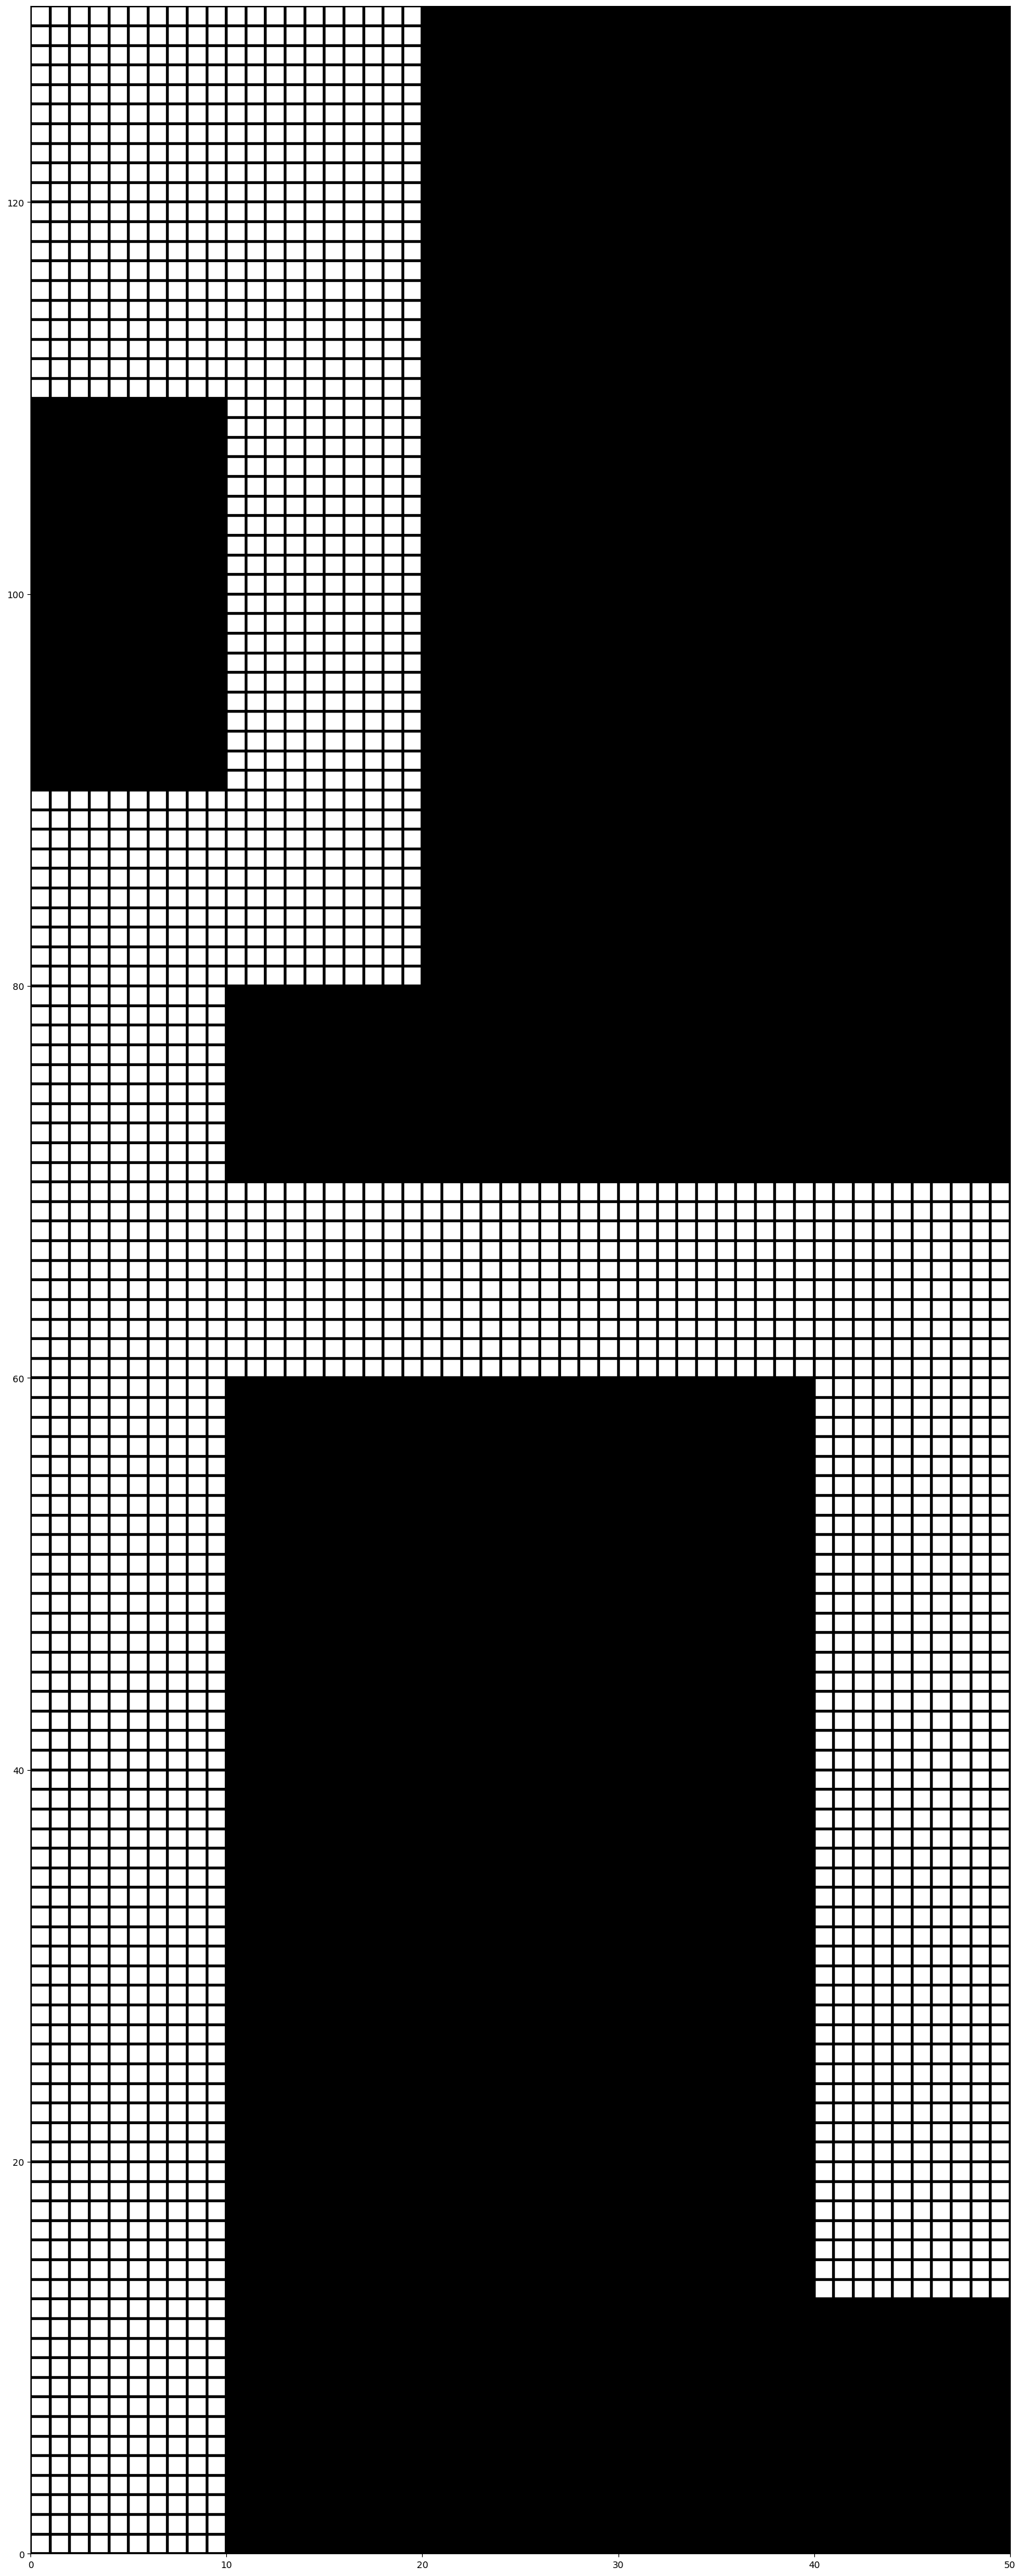

In [ ]:
map=Map(130,50)
for i in range(60):
  for k in range(0,10):
    map.grid[i][k+10][0]=False
    map.grid[i][k+20][0]=False
    map.grid[i][k+30][0]=False

# [9,0] -> [90:100,0:10]
# [100,0] -> [100:110,0:10]
for k in range(0,10):
    for j in range(0,10):
      map.grid[90+k][j][0]=False
      map.grid[100+k][j][0]=False


# 7,3 to 11,3
# every [i,4]

# 7,1-- 7,2 to 11,2
for i in range(70,130):
  for k in range(20,30):
    map.grid[i][k][0]=False

for k in range(0,10):
  for j in range(0,10):
    map.grid[70+k][10+j][0]=False

# 7,3 to 11,3
for i in range(70,130):
  for k in range(30,40):
    map.grid[i][k][0]=False

# every [i,4]
for i in range(13):
  for k in range(40,50):
    map.grid[i][k][0]=False


#[70:130,40:50]
for i in range(70,130):
  for k in range(40,50):
    map.grid[i][k][0]=False



# Open a file and use dump()
with open('10cm_map.pkl', 'wb') as file:

    # A new file will be created
    proof= pickle.dump(map, file)
with open('10cm_map.pkl', 'rb') as file:

    # Call load method to deserialze
    tencm_map = pickle.load(file)

tencm_map.print_map()


In [ ]:
def list_of_obstacles_from_the_map(map,body=False):
  '''this function takes a map as argument and returns a list of obstacles' coordinate'''
  coordinates_list=[]
  if body:
    for width in range(map.width):
      for length in range(map.length):
        if map.grid[width][length][0]==False:
          coordinates_list.append(np.array([width,length]))
  else:
      for width in range(map.width):
        for length in range(map.length):
          if map.grid[width][length]['empty']==False:
            coordinates_list.append(np.array([width,length]))

  return coordinates_list


In [ ]:
tencm_map.grid[3,37]

array([False, array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]])],
      dtype=object)

### Q-learning

In [ ]:
from tqdm import tqdm
Q_table=None
def qlearn(pepper=pepper,n_episodes=1000,max_iter_episode=5000,
                         exploration_proba=1,exploration_decreasing_decay=0.0007,
                         min_exploration_proba=0.01,gamma=0.99,lr=0.5,x_fin=12,
            y_fin=0,steps=1,see_evolution=False,startx=0,starty=0):
  global Q_table
  global steps_per_success_episode
  rewards_per_episode=[]
  steps_per_success_episode=[]
  Q_table=np.zeros(shape=(map.width,map.length,4))
  stringmap='map.pkl'
  if pepper.safety_region==True:
    stringmap='10cm_map.pkl'
  file=open(stringmap,'rb')
  mymap=pickle.load(file)
  pepper=Robot(startx,starty,mymap)
  current_state_x=pepper.x
  current_state_y=pepper.y
  list_index_evolution=[0,int(n_episodes/3),int(n_episodes/2),int(2*n_episodes/3),n_episodes-1]
  first_pos_x=startx
  first_pos_y=starty
  reward=0




  #we iterate over episodes
  for e in tqdm(range(n_episodes)):
      #we initialize the first state of the episode
      #for each epoch I need to put the robot at the start point and
      #to reset map. Now map has only originary obstacles and
      #there is no track of previous epoch's steps
      file=open(stringmap,'rb')
      resetmap=pickle.load(file)
      pepper=Robot(startx,starty,resetmap)
      current_state_x=startx
      current_state_y=starty
      nextstep_random=False
      nextstep_exploit=False
      done = False

      if e==n_episodes-1:
        see_evolution=True





      #sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      direction=['straight','left','right','back']
      for i in range(max_iter_episode):

          # we sample a float from a uniform distribution over 0 and 1
          # if the sampled flaot is less than the exploration proba
          #     the agent selects arandom action
          # else
          #     he exploits his knowledge using the bellman equation


          if np.random.uniform(0,1) < exploration_proba:

            #a random action should be taken by the robot
            #but it should be an allowed action which doesn't provoke an error
            #because of the not empty state of next position
            # we would like to explore, here stop has the same probability
            # of moving, at least for first stages we would like to
            # choose between movements

            direction=['straight','left','right','back']
            while nextstep_random == False:
                  nextstep_random=True
                  chosen_direction=random.choice(direction)
                  action=direction.index(chosen_direction)
                  try:
                    first_pos_x=pepper.x
                    first_pos_y=pepper.y
                    pepper.move(chosen_direction,steps=1)
                    # print(pepper.x, pepper.y)
                    if action!=-1:
                      if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:", first_pos_x,pepper.x," y:",first_pos_y,pepper.y)
                    next_state_x,next_state_y = pepper.x,pepper.y

                  except ValueError:
                    nextstep_random=False
                    Q_table[pepper.x,pepper.y,action]=-100000
                    # we can update that he cannot go in that direction
                    # by removing it from the list
                    # this can help robot to be trapped in a loop
                    #direction.remove(chosen_direction)
            nextstep_random=False

          else:
            direction=['straight','left','right','back']
            while nextstep_exploit==False:
              #here we must return an allowed action, not just the argmax
              #for example it could happen that argmax is the index corresponding to
              #a movement towards to a not-empty state

                action = np.argmax(Q_table[pepper.x,pepper.y])
                #print(direction[action])
                nextstep_exploit=True
                try:
                  first_pos_x=pepper.x
                  first_pos_y=pepper.y
                  pepper.move(direction[action],steps=steps)
                  if action!=-1:
                     if first_pos_x==pepper.x and first_pos_y==pepper.y:
                        print("ERROR:",first_pos_x,pepper.x," y:",first_pos_y,pepper.y)

                  next_state_x,next_state_y = pepper.x,pepper.y

                except ValueError:
              #if it's a forbidden action I can update that value on Q-table into
              #a negative one and restart the while loop until the argmax allowed
              #action is returned
                  Q_table[pepper.x,pepper.y,action]=-100000
                  nextstep_exploit==False
            nextstep_exploit=False
          #track a random epoch to understand where robot has moved
          # if e==3*n_episodes/4:
            # print("position: ", pepper.x,pepper.y)
            # print("position: ", current_state_x, current_state_y, "  ",Q_table[current_state_x,current_state_y,:]
            #       , "next_action: ", np.argmax(Q_table[current_state_x,current_state_y,:]))

          # if see_evolution:
          #     print("Epoch number: ",e)

          #     clear_output(wait=True)
          #     pepper.map.print_map_new(robot_marker=True,x=pepper.y,y=pepper.x)
          #     plt.show()
          #     plt.pause(0.005)




          if pepper.x==x_fin and pepper.y==y_fin: #position of the door (our final stage)
            reward=10000
            done=True
            steps_per_success_episode.append(i)
            break
          else:
            if pepper.safe_mode==True:
              reward=-10
            else: reward=-1


          #print("current_state: ", (current_state_x,current_state_y), " next_state: ", (next_state_x,next_state_y))

          # We update our Q-table using the Q-learning iteration
          Q_table[current_state_x,current_state_y, action] = (1-lr) * Q_table[current_state_x,current_state_y, action] +lr*(reward + gamma*max(Q_table[next_state_x,next_state_y,:]))
          total_episode_reward = total_episode_reward + reward
          # If the episode is finished, we leave the for loop


          current_state_x,current_state_y= next_state_x,next_state_y

      #We update the exploration proba using exponential decay formula
      exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
      rewards_per_episode.append(total_episode_reward)
      #to track the position at the end of each epoch
      # if i==(max_iter_episode-1):
      #   print("Epoch ", e, " final destination: ", pepper.x," ",pepper.y)
      # to track when destination is reached

  return rewards_per_episode

100%|██████████| 1000/1000 [01:48<00:00,  9.18it/s]


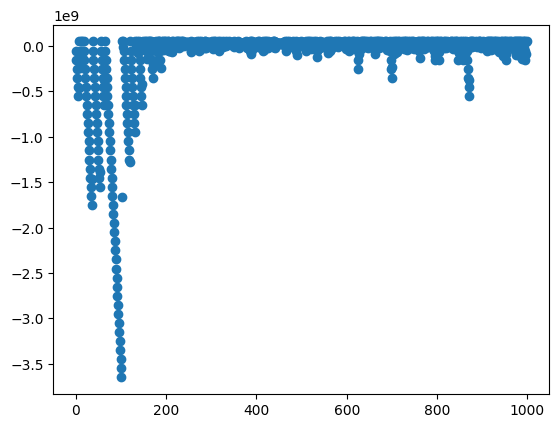

In [ ]:
file=open('10cm_map.pkl','rb')
resetmap=pickle.load(file)
pepper=Robot(3,3,resetmap,safety_region=True,xshape_robot=3,y_shaperobot=3)
rewards_per_episode=qlearn(pepper=pepper,n_episodes=1000,lr=0.001,exploration_decreasing_decay=0.001,x_fin=120,y_fin=5,steps=1,max_iter_episode=10000)
plt.plot([i for i in range(len(rewards_per_episode))],rewards_per_episode,'o')
plt.show()

In [ ]:
print("Mean reward per hundred episodes")
for i in range(10):
    print((i+1)*100,": mean episode reward: ",
           np.mean(rewards_per_episode[100*i:100*(i+1)]))

Mean reward per hundred episodes
100 : mean episode reward:  -986063993.19
200 : mean episode reward:  -275732750.49
300 : mean episode reward:  24970496.3
400 : mean episode reward:  25053550.23
500 : mean episode reward:  24782903.69
600 : mean episode reward:  23330914.39
700 : mean episode reward:  14256030.12
800 : mean episode reward:  9845443.32
900 : mean episode reward:  -6519628.33
1000 : mean episode reward:  7097956.37


In [ ]:
np.argmax(Q_table,axis=2)

array([[0, 0, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 3, ..., 3, 3, 0],
       [3, 1, 0, ..., 1, 0, 1],
       [2, 3, 3, ..., 3, 3, 3]])

### Deep Q-Learning

#### Tensorflow Environment



In [ ]:
!pip install tf-agents[reverb]
!pip install tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 47.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697630 sha256=6a63f478aefd6b4e35ed3581851279420ad0d2e8174f63d2282918088ebd5ad5
  Stored in directory: /root/.cache/pip/wheels/3d/6f/b4/3991d4fae11d0ecb0754c11cc1b4e7745012850da4efaaf0b1
Successfully built gym
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensi

In [ ]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts

In [ ]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

In [ ]:
class PyEnvironment(py_environment.PyEnvironment):

  def reset(self):
    """Return initial_time_step."""
    self._current_time_step = self._reset()
    return self._current_time_step

  def step(self, action):
    """Apply action and return new time_step."""
    if self._current_time_step is None:
        return self.reset()
    self._current_time_step = self._step(action)
    return self._current_time_step

  def current_time_step(self):
    return self._current_time_step

  def time_step_spec(self):
    """Return time_step_spec."""

  @abc.abstractmethod
  def observation_spec(self):
    """Return observation_spec."""

  @abc.abstractmethod
  def action_spec(self):
    """Return action_spec."""

  @abc.abstractmethod
  def _reset(self):
    """Return initial_time_step."""

  @abc.abstractmethod
  def _step(self, action):
    """Apply action and return new time_step."""

In [ ]:
class PepperEnv(py_environment.PyEnvironment):

  def __init__(self,x=3,y=3,xshape_robot=3,y_shaperobot=3,safeborder=1,safety_region=True,x_dest=10,y_dest=5):
    # robot and map initialization#
    stringmap='map.pkl'
    if safety_region==True:
        stringmap='10cm_map.pkl'
    file=open(stringmap,'rb')
    mymap=pickle.load(file)
    file.close()
    self.pepper=Robot(x,y,mymap,xshape_robot,y_shaperobot,safeborder,safety_region)
    self._firstx=x
    self._firsty=y
    self._xshape_robot=xshape_robot
    self._y_shaperobot=y_shaperobot
    self._safeborder=safeborder
    self._safety_region=safety_region


    self._x_dest=x_dest
    self._y_dest=y_dest

    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), dtype=np.int32, minimum=0, maximum=3, name='action')
    self._observation_spec = array_spec.BoundedArraySpec(
        shape=(1,), dtype=np.int32, minimum=0, name='observation')
    self._state = self.pepper.x+self.pepper.y*self.pepper.map.length
    self._episode_ended = False

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec

  def _reset(self):
    self._state = self._firstx+self._firsty*self.pepper.map.length
    stringmap='map.pkl'
    if self.pepper.safety_region==True:
        stringmap='10cm_map.pkl'
    file=open(stringmap,'rb')
    mymap=pickle.load(file)
    file.close()
    self.pepper=Robot(self._firstx,self._firsty,mymap,self._xshape_robot,self._y_shaperobot,self._safeborder,self._safety_region)
    self._episode_ended = False
    return ts.restart(np.array([self._state], dtype=np.int32))

  def _step(self, action):

    if self.pepper.x==self._x_dest and self.pepper.y==self._y_dest:
      self._episode_ended=True


    if self._episode_ended:
      # The last action ended the episode. Ignore the current action and start
      # a new episode.
      return self.reset()

    direction=['straight','left','right','back']
    try:
        self.pepper.move(direction[action],steps=1)
        self._state=self.pepper.x+self.pepper.y*self.pepper.map.length
    except ValueError:
       self._state=self.pepper.x+self.pepper.y*self.pepper.map.length
       return ts.transition(
          np.array([self._state], dtype=np.int32), reward=-1000000.0, discount=1.0)


    if self._episode_ended:
      reward = 100000
      return ts.termination(np.array([self._state], dtype=np.int32), reward)
    else:
      if self.pepper.safe_mode==True:
        return ts.transition(
          np.array([self._state], dtype=np.int32), reward=-10.0, discount=1.0)

      else:
        return ts.transition(
          np.array([self._state], dtype=np.int32), reward=-1.0, discount=1.0)

#### Gymnasium environment

In [ ]:
!pip install gym

In [ ]:
stringmap='10cm_map.pkl'
stringmap='map.pkl'
file=open(stringmap,'rb')
mymap=pickle.load(file)
file.close()

In [ ]:
import gym
from gym import spaces
import pygame
import numpy as np


class GridWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}


    def __init__(self, map=mymap,robot_border=2,safe_border=1,body_robot=False,render_mode=None):
        super(GridWorldEnv, self).__init__()
        self.width=map.width    # The size of the square grid
        self.length=map.length
        self.map=map  # The size of the square grid
        self.window_size = 512  # The size of the PyGame window
        self.grid=np.zeros((self.width, self.length), dtype=np.uint8)

        self.body_robot=body_robot

        self.obstacles=list_of_obstacles_from_the_map(self.map, body=self.body_robot)


        for obstacle in self.obstacles:
          self.grid[obstacle[0]][obstacle[1]]=1
        print(self.obstacles)

        self.safe_border=safe_border
        self.border=robot_border



        # Observations are dictionaries with the agent's and the target's location.
        # Each location is encoded as an element of {0, ..., `size`}^2, i.e. MultiDiscrete([size, size]).
        # self.observation_space = spaces.Dict(
        #     {
        #         "agent": spaces.Box(0, 255, shape=(2,), dtype=int),
        #         "target": spaces.Box(0, 255, shape=(2,), dtype=int),
        #     }
        # )

        min_value=np.array([self.border,self.border])
        max_value=np.array([self.width-self.border,self.length-self.border])
        self.observation_space = spaces.Box(
                low=np.array([self.border, self.border, self.border, self.border]),
                high=np.array([self.width - self.border, self.length - self.border,
                              self.width - self.border, self.length - self.border]),
                shape=(4,), dtype=np.int32
            )

        # We have 4 actions, corresponding to "right", "up", "left", "down"
        self.action_space = spaces.Discrete(4)

        """
        The following dictionary maps abstract actions from `self.action_space` to
        the direction we will walk in if that action is taken.
        I.e. 0 corresponds to "right", 1 to "up" etc.
        """
        self._action_to_direction = {
            0: np.array([1, 0]),
            1: np.array([0, 1]),
            2: np.array([-1, 0]),
            3: np.array([0, -1]),
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None

    def _get_obs(self):
    #  return {"agent": self._agent_location, "target": self._target_location}
      return np.hstack((
          self._agent_location.astype(np.int32),
          self._target_location.astype(np.int32)
      ), dtype=np.int32)

    def _get_info(self):
     return {
        "distance": np.linalg.norm(
            self._agent_location - self._target_location, ord=1
        )
    }

    def check_limits(self,start,safe_border=0):
      # need to put the condition in case of the sum of start,border and safe border are out of bounds
      # but we need to differentiate two scenarios:
      # -1 when start+border > width or length this should be an error because it would mean
      # that in that position there's no available space for robot's body
      # -2 same scenario but with safe_border!=0 this means that flag should be False, as safe-zone cannot be reached
      if start[0]-self.border-safe_border<0 or start[1]-self.border-safe_border<0:
          flag=False
          return flag
      elif start[0]+self.border+safe_border>=map.width or start[1]+self.border+safe_border>=map.length:
          flag=False
          return flag



      region_to_check_x=np.arange(start[0]-self.border-safe_border,start[0]+self.border+safe_border)
      region_to_check_y=np.arange(start[1]-self.border-safe_border,start[1]+self.border+safe_border)
      region_to_check_x=np.delete(region_to_check_x,np.where(region_to_check_x==start[0]))
      region_to_check_y=np.delete(region_to_check_y,np.where(region_to_check_y==start[1]))
      print(region_to_check_x,region_to_check_y)

      flag= np.all(self.grid[region_to_check_x,region_to_check_y]==0)
      print(flag)
      return flag




    def reset(self, seed=None, options=None):
    # We need the following line to seed self.np_random
      super().reset(seed=seed)

      # Choose the agent's location uniformly at random
      min_value=np.array([self.border,self.border])
      max_value=np.array([self.width-self.border,self.length-self.border])
      # self._agent_location = np.array([4,4],dtype=np.int32)
      self._agent_location=np.array([0,0])
      self.grid[self._agent_location[0],self._agent_location[1]]=2


      # condition to avoid choosing randomly obstacle position as agent location
      # print(self.grid[self._agent_location[0]][self._agent_location[1]])
      # while self.grid[self._agent_location[0]][self._agent_location[1]]!=1:
      #   self._agent_location = self.np_random.uniform(low=min_value, high=max_value, size=2).astype(np.int32)
      self._first_location=self._agent_location


      # We will sample the target's location randomly until it does not coincide with the agent's location
      # self._target_location = self._agent_location
      # while np.array_equal(self._target_location, self._agent_location):
      #   while self.grid[self._target_location[0]][self._target_location[1]]!=1:
      #     self._target_location = self.np_random.uniform(
      #         low=min_value,high=max_value, size=2).astype(np.int32)

      # self._target_location= np.array([10,7],dtype=np.int32)
      self._target_location= np.array([10,1],dtype=np.int32)
      observation = self._get_obs()
      info = self._get_info()



      if self.render_mode == "human":
          self._render_frame()

      return observation, info

    def step(self, action):
    # Map the action (element of {0,1,2,3}) to the direction we walk in
    # adding condition of obstacle into the map

      direction = self._action_to_direction[action]

      print(self._target_location)
      print("ACTION:",direction)



      min_value=[self.border,self.border]
      max_value=[self.width-self.border,self.length-self.border]
      #insert the condition that robot has a shape so there should not be obstacle
      #inside his body's region
      self.is_safe=False
      next_x=self._agent_location[0]+direction[0]
      next_y=self._agent_location[1]+direction[1]
      ####CASE 1: robot has a body####
      if self.body_robot:
        if self.grid[next_x,next_y]!=1 and self.check_limits(start=self._agent_location+direction):


          self.grid[self._agent_location[0],self._agent_location[1]]=0
          self._agent_location = np.clip(
              self._agent_location + direction, min_value, max_value
          )
          print("AGENT:",self._agent_location[0],self._agent_location[1])
          # i should understand if it's in safe region or not
          # safe region: location:location+border+safeborder there's an obstacle
          self.is_safe=self.check_limits(start=self._agent_location, safe_border=self.safe_border)
        # else: reward=-1000

      ####CASE 2: robot is a point on the grid#####
      # no need of checking its borders
      # just condition of moving in grid element empty (without obstacle)
      else:
        if self.grid[next_x,next_y]!=1:
          self.grid[self._agent_location[0],self._agent_location[1]]=0
          self._agent_location = np.clip(
              self._agent_location + direction, min_value, max_value
          )
          print("AGENT:",self._agent_location[0],self._agent_location[1])


      self.grid[self._agent_location[0],self._agent_location[1]]=2
      # An episode is done iff the agent has reached the target
      # but I want that target fixed or not?
      terminated = np.array_equal(self._agent_location, self._target_location)
      distance = np.linalg.norm(self._first_location - self._target_location)
      # reward need to differentiate between safe unsafe mode
      if terminated:
        reward = distance
      else:
         if self.is_safe:reward=-1
         else: reward=-10

      observation = self._get_obs()

      info = self._get_info()

      if self.render_mode == "human":
          self._render_frame()

      return observation, reward, terminated, False, info

    def render(self):
      if self.render_mode == "rgb_array":
          return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode(
                (self.window_size, self.window_size)
            )
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = (
            self.window_size / self.size
        )  # The size of a single grid square in pixels

        # First we draw the target
        pygame.draw.rect(
            canvas,
            (255, 0, 0),
            pygame.Rect(
                pix_square_size * self._target_location,
                (pix_square_size, pix_square_size),
            ),
        )
        # Now we draw the agent
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (self._agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )

        # Finally, add some gridlines
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=3,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=3,
            )

        if self.render_mode == "human":
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )

    def close(self):
      if self.window is not None:
        pygame.display.quit()
        pygame.quit()



In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
import gymnasium
from gymnasium.envs.registration import register

# register(
#      id="gym_examples/GridWorld-v0",
#      entry_point="gym_examples.envs:GridWorldEnv",
#      max_episode_steps=300,
# )

gym.envs.register(id="GridWorldEnv-v0",entry_point="__main__:GridWorldEnv")


In [ ]:
stringmap='10cm_map.pkl'
stringmap='map.pkl'
file=open(stringmap,'rb')
mymap=pickle.load(file)
file.close()

env = GridWorldEnv(map=mymap)

[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([1, 1]), array([1, 2]), array([1, 3]), array([1, 4]), array([2, 1]), array([2, 2]), array([2, 3]), array([2, 4]), array([3, 1]), array([3, 2]), array([3, 3]), array([3, 4]), array([4, 1]), array([4, 2]), array([4, 3]), array([4, 4]), array([5, 1]), array([5, 2]), array([5, 3]), array([5, 4]), array([6, 4]), array([7, 1]), array([7, 2]), array([7, 3]), array([7, 4]), array([8, 2]), array([8, 3]), array([8, 4]), array([9, 0]), array([9, 2]), array([9, 3]), array([9, 4]), array([10,  0]), array([10,  2]), array([10,  3]), array([10,  4]), array([11,  2]), array([11,  3]), array([11,  4]), array([12,  2]), array([12,  3]), array([12,  4])]


In [ ]:
env.grid

array([[2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

The original environment's API uses Numpy arrays. The `TFPyEnvironment` converts these to `Tensors` to make it compatible with Tensorflow agents and policies.

In [ ]:
env.reset()

(array([ 0,  0, 10,  1], dtype=int32), {'distance': 11.0})

In [ ]:
!pip install stable-baselines3[extra]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

In [ ]:
from stable_baselines3 import A2C
from stable_baselines3 import DQN

# env = gym.wrappers.TimeLimit(env, max_episode_steps=10)
# env = Monitor(env, allow_early_resets=True)

model = DQN("MlpPolicy", env).learn(total_timesteps=1000000)


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

env.reset()

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

# env.reset()

# model2 = A2C("MlpPolicy", env).learn(total_timesteps=1000)

# env.reset()

# mean_reward2, std_reward2 = evaluate_policy(model2, env, n_eval_episodes=10)


print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

#### New trial

In [ ]:
stringmap='10cm_map.pkl'
file=open(stringmap,'rb')
mymap=pickle.load(file)
file.close()
obstacles=list_of_obstacles_from_the_map(mymap,body=True)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import deque

def check_limits(start, border=3, safe_border=2, map=mymap):
  # need to put the condition in case of the sum of start,border and safe border are out of bounds
  # but we need to differentiate two scenarios:
  # -1 when start+border > width or length this should be an error because it would mean
  # that in that position there's no available space for robot's body
  # -2 same scenario but with safe_border!=0 this means that flag should be False, as safe-zone cannot be reached
  if start[0]-border-safe_border<0 or start[1]-border-safe_border<0:
      flag=False
      return flag
  elif start[0]+border+safe_border>=map.width or start[1]+border+safe_border>=map.length:
      flag=False
      return flag

  region_to_check_x=np.arange(start[0]-border-safe_border,start[0]+border+safe_border)
  region_to_check_y=np.arange(start[1]-border-safe_border,start[1]+border+safe_border)
  region_to_check_x=np.delete(region_to_check_x,np.where(region_to_check_x==start[0]))
  region_to_check_y=np.delete(region_to_check_y,np.where(region_to_check_y==start[1]))
  flag= np.all(map.grid[region_to_check_x,region_to_check_y]==0)
  return flag


class DQNAgent:
    def __init__(self, state_shape=(130,50), action_size=5, safe_zone=True,map=mymap,initial=[5,5],final=[120,5]):
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Fattore di sconto
        self.epsilon = 1.0  # Esplorazione iniziale
        self.epsilon_decay = 0.995  # Decadimento dell'esplorazione
        self.epsilon_min = 0.01  # Limite minimo per l'esplorazione
        self.learning_rate = 0.0001  # Tasso di apprendimento
        self.model = self.build_model()
        self.map=map
        self.safe_zone = safe_zone
        self.state=np.array(initial)
        self.initial_state=np.array(initial)
        self.final_state=np.array(final)
        self.obstacle_map=np.zeros((self.map.width, self.map.length), dtype=np.uint8)

        self.obstacles=obstacles
        print(self.obstacles)


        for obstacle in self.obstacles:
          self.obstacle_map[obstacle[0]][obstacle[1]]=1
        print(self.obstacle_map)

    def build_model(self):
        model = models.Sequential()
        model.add(layers.Dense(64, input_shape=(2,), activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def is_action_invalid(self, state, action):
        # Verifica se l'azione muove il robot in una posizione con un ostacolo
        # Aggiungi ulteriori condizioni se necessario per gestire i confini della mappa
        # e altre regole specifiche
        #0 is back
        #1 is straight
        #2 is right
        #3 is left
        #4 is stop
        x,y=state[0],state[1]
        if action==0:
          if x-1 < 0 or y < 0 or x>=self.obstacle_map.shape[0] or y>=self.obstacle_map.shape[1]:
            return True
          else: return self.obstacle_map[state[0]-1,state[1]]
        elif action==1:
          if x+1 < 0 or y < 0 or x>=self.obstacle_map.shape[0] or y>=self.obstacle_map.shape[1]:
            return True
          else: return self.obstacle_map[state[0]+1,state[1]]
        elif action==2:
          if x < 0 or y+1 < 0 or x>=self.obstacle_map.shape[0] or y>=self.obstacle_map.shape[1]:
            return True
          else: return self.obstacle_map[state[0],state[1]+1]
        else:
          if x < 0 or y-1 < 0 or x>=self.obstacle_map.shape[0] or y>=self.obstacle_map.shape[1]:
            return True
          else: return self.obstacle_map[state[0],state[1]-1]




    def act(self, state):
        fixed_state=state
        if np.random.rand() <= self.epsilon:
          return np.random.choice(self.action_size)


        act_values = self.model.predict(state)
        valid_actions = []
        fixed_state=state
        for a in range(4):
          # print(state)
          if not self.is_action_invalid(fixed_state,a):
             valid_actions.append(a)

        return np.random.choice(valid_actions)

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=100, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay




    def get_next_state(self, state, action):
        # Calcola lo stato successivo in base all'azione
        # Implementa la logica di movimento del robot in base all'azione
        # Ad esempio, spostarsi in su, giù, sinistra o destra di una posizione
        # a seconda dell'azione
        next_state = state
        if action==1:
          next_state[0]=state[0]+1
          next_state[1]=state[1]
        if action==0:
          next_state[0]=state[0]-1
          next_state[1]=state[1]
        if action==2:
          next_state[0]=state[0]
          next_state[1]=state[1]+1
        if action==3:
          next_state[0]=state[0]
          next_state[1]=state[1]-1
        if action==4:
          next_state[0]=state[0]
          next_state[1]=state[1]

        if np.array_equal(next_state,self.final_state):
          done = True
        else:
          done = False
        return next_state, done

    def get_robot_position(self, state):
        # Ottieni la posizione corrente del robot dallo stato
        # Adatta questa funzione in base alla rappresentazione dello stato
        # nel tuo problema specifico
        x,y=state[0],state[1]
        return x, y

    def in_safe_zone(self, state):
        # Verifica se il robot si trova nella "safe zone"
        # Implementa la logica di controllo basata sulla posizione
        # dello stato e sulle dimensioni della "safe zone"
        # Adatta questa funzione in base alla rappresentazione dello stato
        # nel tuo problema specifico
        in_safe_zone=check_limits(state)
        return in_safe_zone

    def compute_reward(self, state, action):
        # Calcola la ricompensa in base allo stato e all'azione
        # Includi una componente di ricompensa più alta quando il robot
        # è nella "safe zone"
        if np.array_equal(state,self.final_state):
          return 100000

        reward_goal=10/np.linalg.norm(state - self.final_state)

        if self.in_safe_zone(state):
            reward_safe_zone = 5  # Aggiungi una ricompensa aggiuntiva quando il robot è nella "safe zone"
        else: reward_safe_zone=0
        total_reward = reward_goal + reward_safe_zone
        return total_reward


In [ ]:
stringmap='10cm_map.pkl'
file=open(stringmap,'rb')
mymap=pickle.load(file)
file.close()

agent = DQNAgent()

# Funzione per valutare le performance del modello su un numero specificato di episodi
def evaluate_agent(agent, num_episodes=100,n_iteration=10000):
    total_rewards = []  # Lista per memorizzare le ricompense totali di ogni episodio
    i=0
    for episode in range(num_episodes):
        agent.state=np.array([5,5])
        done = False
        total_reward = 0
        print("#########",agent.state)
        while not done and i<n_iteration:
            i+=1
            action = agent.act(agent.state)
            next_state, done = agent.get_next_state(agent.state, action)
            print(next_state)
            reward = agent.compute_reward(next_state, action)
            if episode==1: print(next_state)
            total_reward += reward
            agent.state = next_state

        total_rewards.append(total_reward)
    print(total_rewards)
    # Calcola la media delle ricompense totali su tutti gli episodi
    average_reward = sum(total_rewards) / len(total_rewards)
    print("Ricompensa media su", num_episodes, "episodi:", average_reward)

    # Visualizza l'andamento delle ricompense totali per ogni episodio
    plt.plot(total_rewards)
    plt.xlabel('Episodio')
    plt.ylabel('Ricompensa totale')
    plt.title('Andamento delle ricompense totali')
    plt.show()

# Utilizza la funzione per valutare le performance del tuo agente
evaluate_agent(agent, num_episodes=5)


In [ ]:
# test dando azioni definite da me per controllare la funzione action invalid
obstacle_map=np.zeros((130,50), dtype=np.uint8)

def is_action_invalid(self, state, action):
    # Verifica se l'azione muove il robot in una posizione con un ostacolo
    # Aggiungi ulteriori condizioni se necessario per gestire i confini della mappa
    # e altre regole specifiche
    next_state = self.get_next_state(state, action)[0]
    x, y = self.get_robot_position(next_state)
    if x < 0 or y < 0 or x>=self.obstacle_map.shape[0] or y>=self.obstacle_map.shape[1]:
      return True
    print(self.obstacle_map[x, y])
    return self.obstacle_map[x, y]



def get_next_state(state, action):
    # Calcola lo stato successivo in base all'azione
    # Implementa la logica di movimento del robot in base all'azione
    # Ad esempio, spostarsi in su, giù, sinistra o destra di una posizione
    # a seconda dell'azione
    next_state = state
    done=False
    if action==1:
      next_state[0]=state[0]+1
      next_state[1]=state[1]
    if action==0:
      next_state[0]=state[0]-1
      next_state[1]=state[1]
    if action==2:
      next_state[0]=state[0]
      next_state[1]=state[1]+1
    if action==3:
      next_state[0]=state[0]
      next_state[1]=state[1]-1

    return next_state, done

def get_robot_position(state):
    # Ottieni la posizione corrente del robot dallo stato
    # Adatta questa funzione in base alla rappresentazione dello stato
    # nel tuo problema specifico
    x,y=state[0],state[1]
    return x, y



def is_action_invalid(state, action):
    # Verifica se l'azione muove il robot in una posizione con un ostacolo
    # Aggiungi ulteriori condizioni se necessario per gestire i confini della mappa
    # e altre regole specifiche
    #0 is back
    #1 is straight
    #2 is right
    #3 is left
    x,y=state[0],state[1]
    if action==0:
      if x-1 < 0 or y < 0 or x>=obstacle_map.shape[0] or y>=obstacle_map.shape[1]:
        return True
      else: return obstacle_map[state[0]-1,state[1]]
    elif action==1:
      if x+1 < 0 or y < 0 or x>=obstacle_map.shape[0] or y>=obstacle_map.shape[1]:
        return True
      else: return obstacle_map[state[0]+1,state[1]]
    elif action==2:
      if x < 0 or y+1 < 0 or x>=obstacle_map.shape[0] or y>=obstacle_map.shape[1]:
        return True
      else: return obstacle_map[state[0],state[1]+1]
    elif action==3:
      if x < 0 or y-1 < 0 or x>=obstacle_map.shape[0] or y>=obstacle_map.shape[1]:
        return True
      else: return obstacle_map[state[0],state[1]-1]


# print("STATE", state)
# valid_actions = [a for a in range(4) if not is_action_invalid(state, a)]
valid_actions=[]
state=np.array([1,0])

for a in range(4):
  fixed_state=state
  # print(state)
  if not is_action_invalid(fixed_state,a):
    valid_actions.append(a)
print(valid_actions)


# il problema è che quando chiede se l'azione è valida o no sta usando lo state
# che ha usato precedentemente per lo stesso controllo e non lo state di partenza
# in [0,0] solo le azioni 1 e 2 dovrebbero essere permesse
# STATE [0 0]
# X,Y -1 0
# X,Y 0 0
# X,Y 0 1
# X,Y 0 0
# [1, 2, 3]


[0, 1, 2]


#### Hyperparameters


In [ ]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   10# @param {type:"integer"}
replay_buffer_max_length = 100 # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

#### Agent

In [ ]:
fc_layer_params = (30, 10, 4)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]

q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])
# dense_layers = [
#         # First layer
#         tf.keras.layers.Embedding(mymap.width*mymap.length, 4),

#         # Other layers
#         tf.keras.layers.Dense(100, activation=tf.keras.activations.relu)
#     ]

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Define input layers
agent_input = Input(shape=(2,), dtype=tf.int64, name='agent_input')
target_input = Input(shape=(2,), dtype=tf.int64, name='target_input')

# Define embedding layers for agent and target inputs
embedding_layer = Embedding(input_dim=mymap.width * mymap.length, output_dim=80)
embedded_agent = embedding_layer(agent_input)
embedded_target = embedding_layer(target_input)

# Flatten the embedded inputs
flattened_agent = tf.keras.layers.Flatten()(embedded_agent)
flattened_target = tf.keras.layers.Flatten()(embedded_target)

# Concatenate the flattened embeddings
concatenated_embeddings = Concatenate()([flattened_agent, flattened_target])

# Define dense layers
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]

# Pass concatenated embeddings through dense layers
dense_outputs = [dense(concatenated_embeddings) for dense in dense_layers]

# Concatenate the dense outputs with the concatenated embeddings
merged_layers = Concatenate()(dense_outputs + [concatenated_embeddings])

# Define Q values layer
q_values_layer = Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))

# Generate Q values
q_values = q_values_layer(merged_layers)

# Create the model
# q_net = Model(inputs=[agent_input, target_input], outputs=q_values)



Now use `tf_agents.agents.dqn.dqn_agent` to instantiate a `DqnAgent`. In addition to the `time_step_spec`, `action_spec` and the QNetwork, the agent constructor also requires an optimizer (in this case, `AdamOptimizer`), a loss function, and an integer step counter.

In [ ]:
train_env.time_step_spec()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

In [ ]:
train_env.action_spec()


#### Policies

A policy defines the way an agent acts in an environment. Typically, the goal of reinforcement learning is to train the underlying model until the policy produces the desired outcome.

In this tutorial:

-   The desired outcome is keeping the pole balanced upright over the cart.
-   The policy returns an action (left or right) for each `time_step` observation.

Agents contain two policies:

-   `agent.policy` — The main policy that is used for evaluation and deployment.
-   `agent.collect_policy` — A second policy that is used for data collection.


In [ ]:
from tf_agents.policies import q_policy
from tf_agents.networks import network
from tf_agents.policies import greedy_policy



class QNetwork(network.Network):

  def __init__(self, input_tensor_spec, action_spec, num_actions=num_actions, name=None):
    super(QNetwork, self).__init__(
        input_tensor_spec=input_tensor_spec,
        state_spec=(),
        name=name)
    self._sub_layers = [
        tf.keras.layers.Dense(num_actions),
    ]

  def call(self, inputs, step_type=None, network_state=()):
    del step_type
    inputs = tf.cast(inputs, tf.float32)
    for layer in self._sub_layers:
      inputs = layer(inputs)
    return inputs, network_state
my_q_policy_eval = q_policy.QPolicy(
    eval_env.time_step_spec(), eval_env.action_spec(), q_network=q_net)
# my_q_policy_collect=q_policy.QPolicy(
#     train_env.time_step_spec(), train_env.action_spec(), q_network=q_net)
my_q_policy_collect=greedy_policy.GreedyPolicy(my_q_policy_eval)


In [ ]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

Policies can be created independently of agents. For example, use `tf_agents.policies.random_tf_policy` to create a policy which will randomly select an action for each `time_step`.

In [ ]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

To get an action from a policy, call the `policy.action(time_step)` method. The `time_step` contains the observation from the environment. This method returns a `PolicyStep`, which is a named tuple with three components:

-   `action` — the action to be taken
-   `state` — used for stateful (that is, RNN-based) policies
-   `info` — auxiliary data, such as log probabilities of actions

#### Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode. Several episodes are run, creating an average return.

The following function computes the average return of a policy, given the policy, environment, and a number of episodes.


In [ ]:
def compute_avg_return(environment, policy, num_episodes=100,max_iterations=1000):

  total_return = 0.0
  global list_reward
  list_reward=[]
  list_end_points=[]
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0
    i=0


    while not time_step.is_last() and i<max_iterations:
      i+=1
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
      # assert (time_step.reward!=0)
      # if time_step.reward[0].numpy()!=-10 and time_step.reward[0].numpy()!=-1 and time_step.reward[0].numpy()!=-100:
      #   # print(time_step.reward[0].numpy)
      #   list_reward.append(time_step.reward)
        # print("Unexpected reward")
      # if i==max_iterations:
      # list_end_points.append((environment.envs[0].pepper.x,environment.envs[0].pepper.y))


    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0], list_end_points


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

Running this computation on the `random_policy` shows a baseline performance in the environment.

In [ ]:
eval_env.reset()

In [ ]:
random_results,lista=compute_avg_return(eval_env, random_policy, num_eval_episodes)

In [ ]:
lista=compute_avg_return(eval_env, random_policy, num_eval_episodes)[1]

#### Replay Buffer

In order to keep track of the data collected from the environment, we will use [Reverb](https://deepmind.com/research/open-source/Reverb), an efficient, extensible, and easy-to-use replay system by Deepmind. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using agent.collect_data_spec.


In [ ]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

#### Data Collection

Now execute the random policy in the environment for a few steps, recording the data in the replay buffer.

Here we are using 'PyDriver' to run the experience collecting loop. You can learn more about TF Agents driver in our [drivers tutorial](https://www.tensorflow.org/agents/tutorials/4_drivers_tutorial).

In [ ]:
#@test {"skip": true}
# import pdb

# # Esegui questo comando per avviare il debugger
# pdb.set_trace()
py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(train_py_env.reset())

In [ ]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

dataset

In [ ]:
iterator = iter(dataset)
print(iterator)

#### Training the agent

Two things must happen during the training loop:

-   collect data from the environment
-   use that data to train the agent's neural network(s)

This example also periodicially evaluates the policy and prints the current score.

The following will take ~5 minutes to run.

In [ ]:
#@test {"skip": true}
try:
  %%time
except:
  pass
list_points=[]
# (Optional) Optimize by wrapping some of the code in a graph using TF function.
# agent.train = common.function(agent.train)
returns=[]
# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
# avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)[0]
# returns = [avg_return]

# Reset the environment.
time_step = train_py_env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)[0]
    # list_points.append(compute_avg_return(eval_env, my_q_policy_eval, num_eval_episodes)[1])
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

In [ ]:
#list of pepper coordinates during all the iterations of different episodes
# episode is the first index
set(list_points[0])

#### Plots

Use `matplotlib.pyplot` to chart how the policy improved during training.

The charts shows the return increasing towards that maximum each time it is evaluated during training. (It may be a little unstable and not increase monotonically each time.)

In [ ]:
returns

In [ ]:
#@test {"skip": true}

iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=250)

### Robot navigation with Q-learning


In [ ]:
class AStar:
    def __init__(self, grid_map,  xshape_robot=3, yshape_robot=3, safeborder=2, safety_region=False):
        self.grid_map = grid_map
        self.rows, self.cols = grid_map.shape
        self.xshape_robot = xshape_robot
        self.yshape_robot = yshape_robot
        self.safeborder = safeborder
        self.safety_region = safety_region

    def check_border(self, node):
        x, y = node
        x_start = x - self.xshape_robot
        x_end = x + self.xshape_robot
        y_start = y - self.yshape_robot
        y_end = y + self.yshape_robot
        if x_start < 0 or x_end >= self.rows or y_start < 0 or y_end >= self.cols:
            return False
        if self.grid_map[x_start:x_end, y_start:y_end].any():
            return False
        return True

    def check_safety_region(self, node):
        x, y = node
        x_start = x - self.xshape_robot - self.safeborder
        x_end = x + self.xshape_robot + self.safeborder
        y_start = y - self.yshape_robot - self.safeborder
        y_end = y + self.yshape_robot + self.safeborder
        if x_start < 0 or x_end >= self.rows or y_start < 0 or y_end >= self.cols:
            return False
        if self.grid_map[x_start:x_end, y_start:y_end].any():
            return False
        return True

    def heuristic(self, current, goal):
        # Euclidean distance heuristic
        return np.linalg.norm(np.array(current) - np.array(goal))

    def get_neighbors(self, node):
        x, y = node
        neighbors = [(x + dx, y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1]]
        valid_neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < self.rows and 0 <= ny < self.cols and not self.grid_map[nx, ny] and self.check_border((nx,ny))]
        valid_neighbors.remove(node)
        if self.safety_region:
            not_safety_neighbors = [node for node in valid_neighbors if not self.check_safety_region(node)]
            if len(not_safety_neighbors) > 0 and len(valid_neighbors) > len(not_safety_neighbors)+1:
                return [node for node in valid_neighbors if node not in not_safety_neighbors]
        return valid_neighbors

    def a_star(self, start, goal):
        if not self.check_border(start) or not self.check_border(goal):
            return None
        open_set = {start}
        came_from = {}
        g_score = {start: 0}
        f_score = {start: self.heuristic(start, goal)}

        while open_set:
            current = min(open_set, key=lambda node: f_score[node])
            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                return path[::-1]

            open_set.remove(current)
            for neighbor in self.get_neighbors(current):
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    if neighbor not in open_set:
                        open_set.add(neighbor)

        return None

In [ ]:
border=120
grid = np.zeros((border,50), dtype=bool)
for i in range(60):
  for k in range(0,10):
    grid[i][k+10]=True
    grid[i][k+20]=True
    grid[i][k+30]=True

# [9,0] -> [90:100,0:10]
# [100,0] -> [100:110,0:10]
for k in range(0,10):
    for j in range(0,10):
      grid[90+k][j]=True
      grid[100+k][j]=True


# 7,3 to 11,3
# every [i,4]

# 7,1-- 7,2 to 11,2
for i in range(70,border):
  for k in range(20,30):
    grid[i][k]=True

for k in range(0,10):
  for j in range(0,10):
    grid[70+k][10+j]=True

# 7,3 to 11,3
for i in range(70,border):
  for k in range(30,40):
    grid[i][k]=True

# every [i,4]
for i in range(border/10):
  for k in range(40,50):
    grid[i][k]=True

In [ ]:
astar = AStar(grid)
start_node = (5, 5)
goal_node = (125, 5)
path = astar.a_star(start_node, goal_node)
print("A* path:", path)
len(path)

A* path: [(6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 5), (17, 5), (18, 5), (19, 5), (20, 5), (21, 5), (22, 5), (23, 5), (24, 5), (25, 5), (26, 5), (27, 5), (28, 5), (29, 5), (30, 5), (31, 5), (32, 5), (33, 5), (34, 5), (35, 5), (36, 5), (37, 5), (38, 5), (39, 5), (40, 5), (41, 5), (42, 5), (43, 5), (44, 5), (45, 5), (46, 5), (47, 5), (48, 5), (49, 5), (50, 5), (51, 5), (52, 5), (53, 5), (54, 5), (55, 5), (56, 5), (57, 5), (58, 5), (59, 5), (60, 5), (61, 5), (62, 5), (63, 5), (64, 5), (65, 5), (66, 5), (67, 5), (68, 5), (69, 5), (70, 5), (71, 5), (72, 5), (73, 5), (74, 5), (75, 5), (76, 5), (77, 5), (78, 5), (79, 5), (80, 5), (81, 6), (82, 7), (83, 8), (84, 9), (85, 10), (86, 11), (87, 12), (88, 13), (89, 13), (90, 13), (91, 13), (92, 13), (93, 13), (94, 13), (95, 13), (96, 13), (97, 13), (98, 13), (99, 13), (100, 13), (101, 13), (102, 13), (103, 13), (104, 13), (105, 13), (106, 13), (107, 13), (108, 13), (109, 13), (110, 13), (111, 13), (

120

In [ ]:
astar.get_neighbors((65,44))

[(64, 43),
 (64, 44),
 (64, 45),
 (65, 43),
 (65, 45),
 (66, 43),
 (66, 44),
 (66, 45)]

([<matplotlib.axis.YTick at 0x7e6a6a80c8b0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100'),
  Text(0, 110, '110'),
  Text(0, 120, '120')])

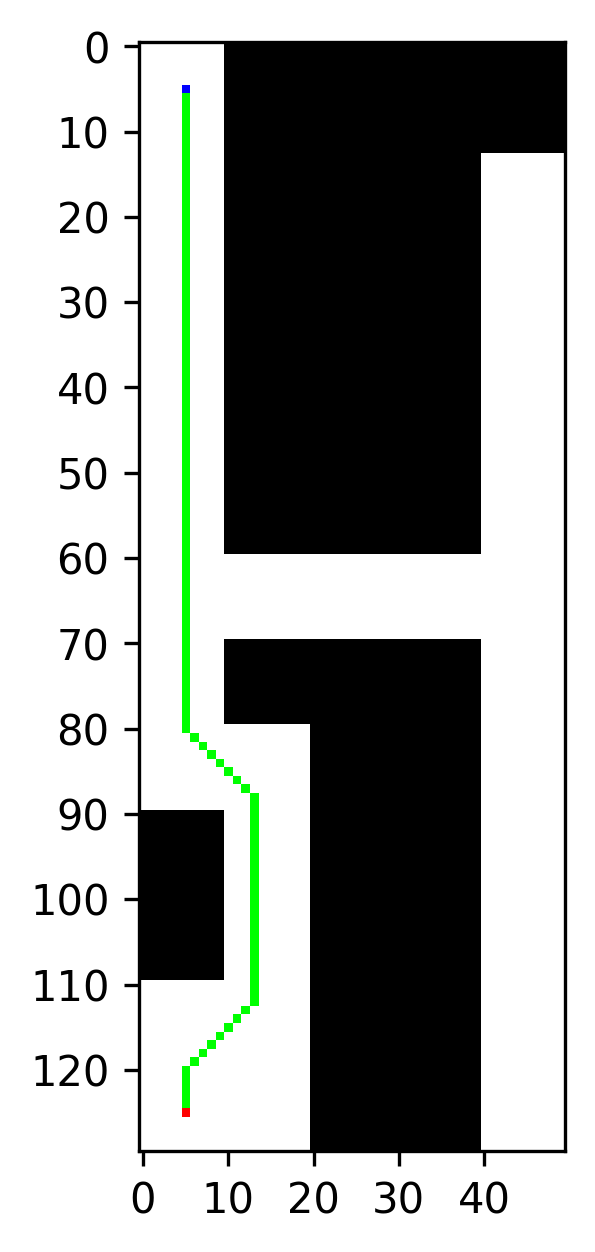

In [ ]:
tmp = np.zeros((grid.shape[0], grid.shape[1], 3), dtype=np.uint8)
tmp[grid==0] = [255, 255, 255]
tmp[grid==1] = [0, 0, 0]

tmp[start_node] = [0, 0, 255]
for node in path:
    tmp[node] = [0, 255, 0]
tmp[goal_node] = [255, 0, 0]

plt.figure(dpi=300)

plt.imshow(tmp, origin="upper")
x_values = np.arange(0, grid.shape[1], 10)  # Adjust the range as needed
plt.xticks(x_values)
y_values = np.arange(0, grid.shape[0], 10)  # Adjust the range as needed
plt.yticks(y_values)

([<matplotlib.axis.YTick at 0x7e6a38d39630>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100'),
  Text(0, 110, '110'),
  Text(0, 120, '120')])

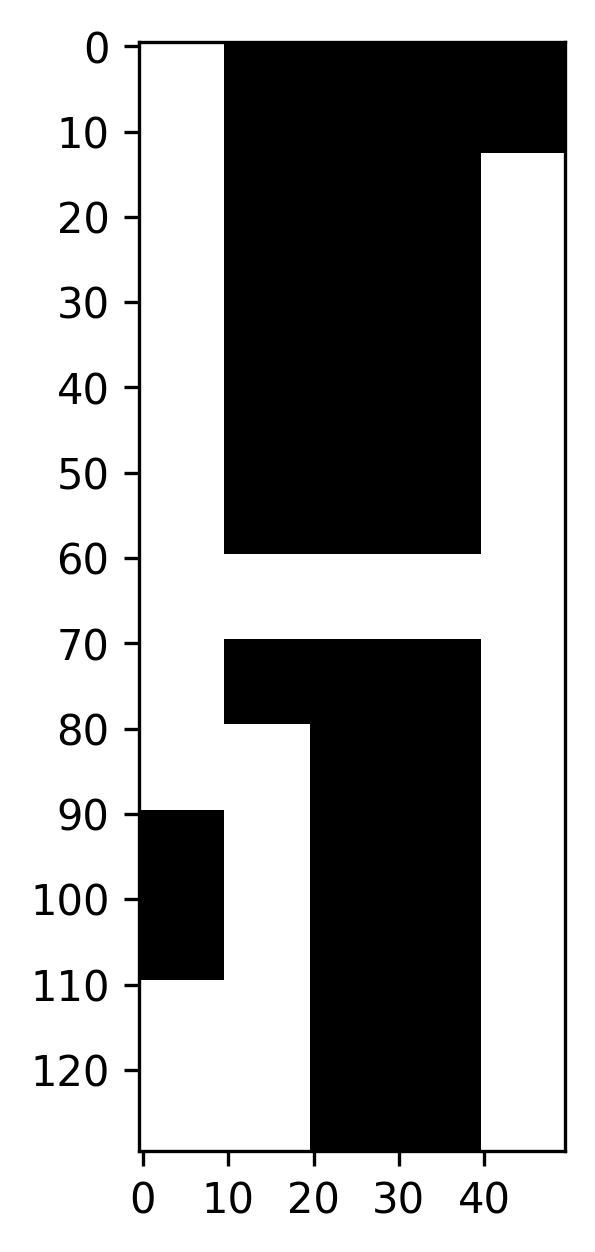

In [ ]:
tmp = np.zeros((grid.shape[0], grid.shape[1], 3), dtype=np.uint8)
tmp[grid==0] = [255, 255, 255]
tmp[grid==1] = [0, 0, 0]

plt.figure(dpi=300)

plt.imshow(tmp, origin="upper")
x_values = np.arange(0, grid.shape[1], 10)  # Adjust the range as needed
plt.xticks(x_values)
y_values = np.arange(0, grid.shape[0], 10)  # Adjust the range as needed
plt.yticks(y_values)